In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.utils import shuffle
from keras.optimizers import RMSprop

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve,confusion_matrix,accuracy_score, auc

from sklearn.metrics import precision_recall_fscore_support, f1_score
from sklearn.preprocessing import StandardScaler

from pylab import rcParams
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from tensorflow import keras
from keras import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPool1D
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.model_selection import StratifiedKFold

Using TensorFlow backend.
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in version 0.24

In [2]:
import os


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing, metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from keras import backend as K
from keras.models import Model
from keras.layers import Input, Dense, Lambda, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras import regularizers
from sklearn.utils import shuffle



In [3]:
# Read the dataset
df = pd.read_csv('F:creditcard.csv')
#check on the size of the dataframe

test_split = 0.1 #portion of data used for testing
 #portion of training data used for validation
    
# We separate the feature vector from the classification result
X = df.drop('Class',axis=1).values
y = df['Class'].values

In [4]:
# Feature scaling
X -= X.min(axis=0)
X /= X.max(axis=0)

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Fold #1
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511766, 30)
After OverSampling, the shape of train_y: (511766,) 

After OverSampling, counts of label '1': 255883
After OverSampling, counts of label '0': 255883
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 27)           837         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 27)           108         dense_1[0][0]                    
_____________________________________________________________________________________

511766/511766 [==============================] - 24s 48us/step - loss: 11.1456 - rec_loss: 17.2062 - kl_loss: 4.1507 - val_loss: 12.9932 - val_rec_loss: 22.5469 - val_kl_loss: 3.0477
Epoch 17/150
511766/511766 [==============================] - 25s 48us/step - loss: 11.1023 - rec_loss: 17.1328 - kl_loss: 4.1511 - val_loss: 13.1591 - val_rec_loss: 23.1307 - val_kl_loss: 2.8106
Epoch 18/150
511766/511766 [==============================] - 25s 48us/step - loss: 11.0635 - rec_loss: 17.0622 - kl_loss: 4.1465 - val_loss: 13.2965 - val_rec_loss: 23.3895 - val_kl_loss: 2.8117
Epoch 19/150
511766/511766 [==============================] - 24s 48us/step - loss: 11.0870 - rec_loss: 17.1175 - kl_loss: 4.1382 - val_loss: 13.1974 - val_rec_loss: 23.0850 - val_kl_loss: 2.9433
Epoch 20/150
511766/511766 [==============================] - 25s 48us/step - loss: 11.0108 - rec_loss: 16.9804 - kl_loss: 4.1333 - val_loss: 13.2330 - val_rec_loss: 23.1629 - val_kl_loss: 2.9374
Epoch 21/150
511766/511766 [=====

Epoch 58/150
511766/511766 [==============================] - 24s 48us/step - loss: 10.6292 - rec_loss: 16.4368 - kl_loss: 4.1154 - val_loss: 12.7688 - val_rec_loss: 22.3109 - val_kl_loss: 2.9012
Epoch 59/150
511766/511766 [==============================] - 24s 48us/step - loss: 10.6077 - rec_loss: 16.3988 - kl_loss: 4.1109 - val_loss: 12.7711 - val_rec_loss: 22.4640 - val_kl_loss: 2.7609
Epoch 60/150
511766/511766 [==============================] - 25s 48us/step - loss: 10.6456 - rec_loss: 16.4778 - kl_loss: 4.1146 - val_loss: 12.6265 - val_rec_loss: 22.0323 - val_kl_loss: 2.8977
Epoch 61/150
511766/511766 [==============================] - 24s 48us/step - loss: 10.5875 - rec_loss: 16.3801 - kl_loss: 4.1041 - val_loss: 12.8249 - val_rec_loss: 22.2005 - val_kl_loss: 3.1270
Epoch 62/150
511766/511766 [==============================] - 24s 48us/step - loss: 10.5606 - rec_loss: 16.3194 - kl_loss: 4.1107 - val_loss: 12.8705 - val_rec_loss: 22.3902 - val_kl_loss: 3.0484
Epoch 63/150
511766/

Epoch 100/150
511766/511766 [==============================] - 25s 48us/step - loss: 10.5835 - rec_loss: 16.3382 - kl_loss: 4.1508 - val_loss: 13.0992 - val_rec_loss: 22.4632 - val_kl_loss: 3.4303
Epoch 101/150
511766/511766 [==============================] - 24s 48us/step - loss: 10.6087 - rec_loss: 16.4030 - kl_loss: 4.1455 - val_loss: 13.2622 - val_rec_loss: 23.2535 - val_kl_loss: 2.9558
Epoch 102/150
511766/511766 [==============================] - 25s 48us/step - loss: 10.6056 - rec_loss: 16.3856 - kl_loss: 4.1540 - val_loss: 12.8635 - val_rec_loss: 22.6923 - val_kl_loss: 2.7394
Epoch 103/150
511766/511766 [==============================] - 25s 48us/step - loss: 10.5778 - rec_loss: 16.3442 - kl_loss: 4.1481 - val_loss: 13.1224 - val_rec_loss: 22.9998 - val_kl_loss: 2.9538
Epoch 104/150
511766/511766 [==============================] - 25s 48us/step - loss: 10.5534 - rec_loss: 16.2900 - kl_loss: 4.1428 - val_loss: 12.7190 - val_rec_loss: 22.1907 - val_kl_loss: 2.9464
Epoch 105/150
5

511766/511766 [==============================] - 24s 48us/step - loss: 10.5716 - rec_loss: 16.3582 - kl_loss: 4.1319 - val_loss: 13.3454 - val_rec_loss: 23.6989 - val_kl_loss: 2.6900
Epoch 142/150
511766/511766 [==============================] - 24s 48us/step - loss: 10.4988 - rec_loss: 16.2219 - kl_loss: 4.1248 - val_loss: 12.9166 - val_rec_loss: 22.5547 - val_kl_loss: 2.9783
Epoch 143/150
511766/511766 [==============================] - 24s 48us/step - loss: 10.4990 - rec_loss: 16.2192 - kl_loss: 4.1239 - val_loss: 13.4357 - val_rec_loss: 23.6659 - val_kl_loss: 2.9035
Epoch 144/150
511766/511766 [==============================] - 24s 48us/step - loss: 10.4884 - rec_loss: 16.2044 - kl_loss: 4.1219 - val_loss: 12.7409 - val_rec_loss: 22.3267 - val_kl_loss: 2.8516
Epoch 145/150
511766/511766 [==============================] - 24s 48us/step - loss: 10.5419 - rec_loss: 16.3051 - kl_loss: 4.1252 - val_loss: 12.8427 - val_rec_loss: 22.3933 - val_kl_loss: 2.9793
Epoch 146/150
511766/511766 [

Epoch 42/50
511766/511766 [==============================] - 86s 168us/step - loss: 0.0601 - accuracy: 0.9795 - val_loss: 0.0698 - val_accuracy: 0.9739
Epoch 43/50
511766/511766 [==============================] - 86s 169us/step - loss: 0.0596 - accuracy: 0.9794 - val_loss: 0.0694 - val_accuracy: 0.9741
Epoch 44/50
511766/511766 [==============================] - 88s 172us/step - loss: 0.0596 - accuracy: 0.9795 - val_loss: 0.0676 - val_accuracy: 0.9753
Epoch 45/50
511766/511766 [==============================] - 88s 172us/step - loss: 0.0600 - accuracy: 0.9793 - val_loss: 0.0707 - val_accuracy: 0.9742
Epoch 46/50
511766/511766 [==============================] - 87s 171us/step - loss: 0.0597 - accuracy: 0.9794 - val_loss: 0.0699 - val_accuracy: 0.9745
Epoch 47/50
511766/511766 [==============================] - 88s 171us/step - loss: 0.0595 - accuracy: 0.9796 - val_loss: 0.0704 - val_accuracy: 0.9739
Epoch 48/50
511766/511766 [==============================] - 88s 171us/step - loss: 0.05

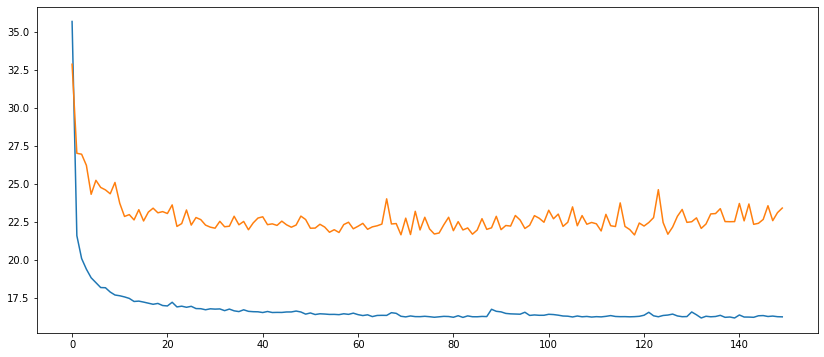

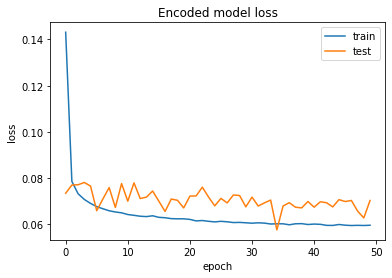

Overall accuracy of Convolutional Neural Network model: 0.9737368772163899


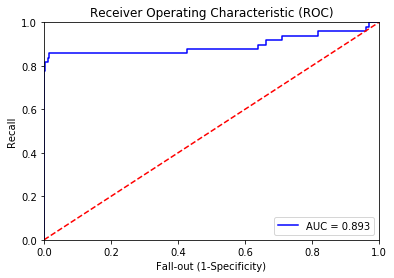

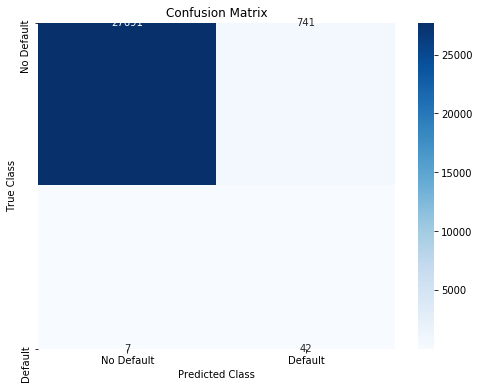

AUC(ROC): 0.9155403368437978
Precision: 0.05363984674329502
Recall: 0.8571428571428571
F1 score: 0.10096153846153846
False positives: 741
True positives: 42
False negatives: 7
True negatives: 27691
Fold #2
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511766, 30)
After OverSampling, the shape of train_y: (511766,) 

After OverSampling, counts of label '1': 255883
After OverSampling, counts of label '0': 255883
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 27)           837         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_12 (BatchNo (None, 27)           108         dense_10[0][0]                   
_____________________________________________________________________________________

511766/511766 [==============================] - 25s 49us/step - loss: 11.2518 - rec_loss: 17.4210 - kl_loss: 4.1501 - val_loss: 13.5102 - val_rec_loss: 23.8665 - val_kl_loss: 2.7587
Epoch 17/150
511766/511766 [==============================] - 25s 49us/step - loss: 11.2015 - rec_loss: 17.3487 - kl_loss: 4.1435 - val_loss: 13.4279 - val_rec_loss: 23.6019 - val_kl_loss: 2.8734
Epoch 18/150
511766/511766 [==============================] - 25s 48us/step - loss: 11.1633 - rec_loss: 17.2959 - kl_loss: 4.1523 - val_loss: 13.7180 - val_rec_loss: 24.2284 - val_kl_loss: 2.8278
Epoch 19/150
511766/511766 [==============================] - 25s 49us/step - loss: 11.1212 - rec_loss: 17.2449 - kl_loss: 4.1405 - val_loss: 13.6148 - val_rec_loss: 23.9630 - val_kl_loss: 2.8784
Epoch 20/150
511766/511766 [==============================] - 25s 49us/step - loss: 11.0897 - rec_loss: 17.2048 - kl_loss: 4.1440 - val_loss: 14.0183 - val_rec_loss: 24.7977 - val_kl_loss: 2.8567
Epoch 21/150
511766/511766 [=====

Epoch 58/150
511766/511766 [==============================] - 24s 48us/step - loss: 10.7715 - rec_loss: 16.6888 - kl_loss: 4.1825 - val_loss: 13.3263 - val_rec_loss: 23.5377 - val_kl_loss: 2.7844
Epoch 59/150
511766/511766 [==============================] - 24s 48us/step - loss: 10.7633 - rec_loss: 16.6520 - kl_loss: 4.1960 - val_loss: 13.3777 - val_rec_loss: 23.5921 - val_kl_loss: 2.8374
Epoch 60/150
511766/511766 [==============================] - 24s 48us/step - loss: 10.6878 - rec_loss: 16.5111 - kl_loss: 4.1939 - val_loss: 13.2251 - val_rec_loss: 23.3345 - val_kl_loss: 2.8106
Epoch 61/150
511766/511766 [==============================] - 24s 48us/step - loss: 10.7545 - rec_loss: 16.6569 - kl_loss: 4.1842 - val_loss: 13.6658 - val_rec_loss: 24.0049 - val_kl_loss: 3.0028
Epoch 62/150
511766/511766 [==============================] - 24s 48us/step - loss: 10.8234 - rec_loss: 16.7752 - kl_loss: 4.1975 - val_loss: 13.3027 - val_rec_loss: 23.5771 - val_kl_loss: 2.6899
Epoch 63/150
511766/

Epoch 100/150
511766/511766 [==============================] - 24s 47us/step - loss: 10.6607 - rec_loss: 16.4708 - kl_loss: 4.2318 - val_loss: 13.0534 - val_rec_loss: 23.1076 - val_kl_loss: 2.6850
Epoch 101/150
511766/511766 [==============================] - 24s 47us/step - loss: 10.7052 - rec_loss: 16.5396 - kl_loss: 4.2437 - val_loss: 13.5853 - val_rec_loss: 23.8817 - val_kl_loss: 2.9588
Epoch 102/150
511766/511766 [==============================] - 24s 47us/step - loss: 10.6674 - rec_loss: 16.4762 - kl_loss: 4.2363 - val_loss: 13.6256 - val_rec_loss: 24.0494 - val_kl_loss: 2.8735
Epoch 103/150
511766/511766 [==============================] - 24s 47us/step - loss: 10.6446 - rec_loss: 16.4360 - kl_loss: 4.2305 - val_loss: 13.1187 - val_rec_loss: 23.0301 - val_kl_loss: 2.8851
Epoch 104/150
511766/511766 [==============================] - 24s 47us/step - loss: 10.6889 - rec_loss: 16.5240 - kl_loss: 4.2353 - val_loss: 13.4223 - val_rec_loss: 23.8043 - val_kl_loss: 2.7213
Epoch 105/150
5

511766/511766 [==============================] - 25s 48us/step - loss: 10.6232 - rec_loss: 16.3677 - kl_loss: 4.2601 - val_loss: 13.3512 - val_rec_loss: 23.3131 - val_kl_loss: 3.0720
Epoch 142/150
511766/511766 [==============================] - 25s 49us/step - loss: 10.6282 - rec_loss: 16.3825 - kl_loss: 4.2687 - val_loss: 13.4969 - val_rec_loss: 23.7493 - val_kl_loss: 2.9294
Epoch 143/150
511766/511766 [==============================] - 25s 49us/step - loss: 10.6749 - rec_loss: 16.4652 - kl_loss: 4.2729 - val_loss: 13.5237 - val_rec_loss: 23.5998 - val_kl_loss: 3.1238
Epoch 144/150
511766/511766 [==============================] - 25s 49us/step - loss: 10.6337 - rec_loss: 16.3830 - kl_loss: 4.2773 - val_loss: 14.2084 - val_rec_loss: 25.1898 - val_kl_loss: 2.8921
Epoch 145/150
511766/511766 [==============================] - 27s 53us/step - loss: 10.6576 - rec_loss: 16.4302 - kl_loss: 4.2743 - val_loss: 13.2651 - val_rec_loss: 23.3204 - val_kl_loss: 2.8842
Epoch 146/150
511766/511766 [

Epoch 42/50
511766/511766 [==============================] - 90s 177us/step - loss: 0.0356 - accuracy: 0.9893 - val_loss: 0.0475 - val_accuracy: 0.9819
Epoch 43/50
511766/511766 [==============================] - 90s 176us/step - loss: 0.0356 - accuracy: 0.9894 - val_loss: 0.0448 - val_accuracy: 0.9834
Epoch 44/50
511766/511766 [==============================] - 92s 180us/step - loss: 0.0355 - accuracy: 0.9893 - val_loss: 0.0459 - val_accuracy: 0.9825
Epoch 45/50
511766/511766 [==============================] - 91s 178us/step - loss: 0.0358 - accuracy: 0.9894 - val_loss: 0.0449 - val_accuracy: 0.9827
Epoch 46/50
511766/511766 [==============================] - 89s 174us/step - loss: 0.0353 - accuracy: 0.9893 - val_loss: 0.0436 - val_accuracy: 0.9839
Epoch 47/50
511766/511766 [==============================] - 89s 174us/step - loss: 0.0356 - accuracy: 0.9893 - val_loss: 0.0477 - val_accuracy: 0.9830
Epoch 48/50
511766/511766 [==============================] - 90s 176us/step - loss: 0.03

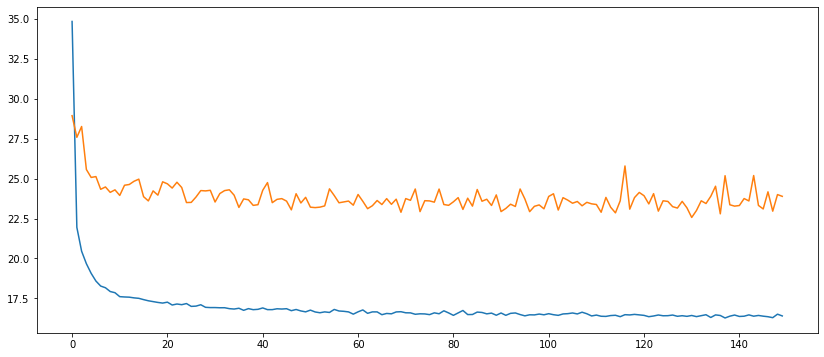

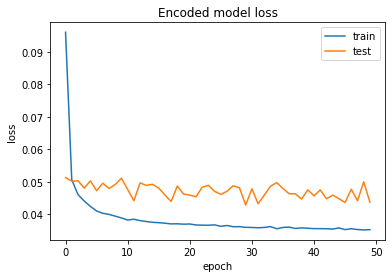

Overall accuracy of Convolutional Neural Network model: 0.9830062146694287


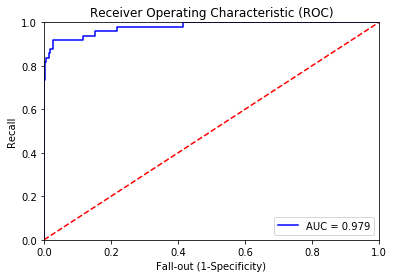

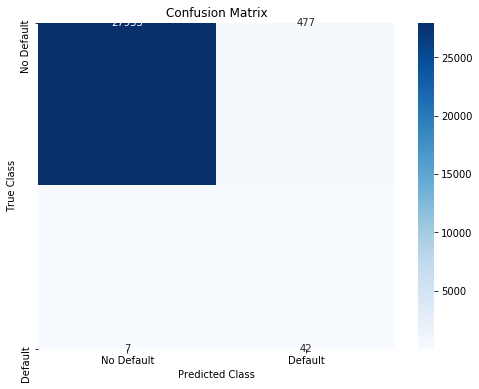

AUC(ROC): 0.9201829930058687
Precision: 0.08092485549132948
Recall: 0.8571428571428571
F1 score: 0.14788732394366197
False positives: 477
True positives: 42
False negatives: 7
True negatives: 27955
Fold #3
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511766, 30)
After OverSampling, the shape of train_y: (511766,) 

After OverSampling, counts of label '1': 255883
After OverSampling, counts of label '0': 255883
Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_19 (Dense)                (None, 27)           837         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_23 (BatchNo (None, 27)           108         dense_19[0][0]                   
_____________________________________________________________________________________

511766/511766 [==============================] - 26s 51us/step - loss: 11.3244 - rec_loss: 17.2154 - kl_loss: 4.2810 - val_loss: 13.5160 - val_rec_loss: 23.5995 - val_kl_loss: 2.9493
Epoch 17/150
511766/511766 [==============================] - 26s 50us/step - loss: 11.2964 - rec_loss: 17.1674 - kl_loss: 4.2769 - val_loss: 13.2982 - val_rec_loss: 23.1022 - val_kl_loss: 3.0054
Epoch 18/150
511766/511766 [==============================] - 26s 51us/step - loss: 11.2688 - rec_loss: 17.1244 - kl_loss: 4.2815 - val_loss: 13.5183 - val_rec_loss: 23.5272 - val_kl_loss: 3.0287
Epoch 19/150
511766/511766 [==============================] - 26s 50us/step - loss: 11.2576 - rec_loss: 17.1067 - kl_loss: 4.2773 - val_loss: 13.4553 - val_rec_loss: 23.4973 - val_kl_loss: 2.9294
Epoch 20/150
511766/511766 [==============================] - 26s 50us/step - loss: 11.2053 - rec_loss: 17.0035 - kl_loss: 4.2793 - val_loss: 13.3031 - val_rec_loss: 23.1383 - val_kl_loss: 2.9787
Epoch 21/150
511766/511766 [=====

Epoch 58/150
511766/511766 [==============================] - 26s 50us/step - loss: 10.8615 - rec_loss: 16.4564 - kl_loss: 4.3167 - val_loss: 12.9134 - val_rec_loss: 22.3924 - val_kl_loss: 3.0198
Epoch 59/150
511766/511766 [==============================] - 26s 51us/step - loss: 10.8722 - rec_loss: 16.4940 - kl_loss: 4.3135 - val_loss: 12.6852 - val_rec_loss: 21.9846 - val_kl_loss: 2.9683
Epoch 60/150
511766/511766 [==============================] - 26s 51us/step - loss: 10.8316 - rec_loss: 16.4134 - kl_loss: 4.3141 - val_loss: 12.9025 - val_rec_loss: 22.4810 - val_kl_loss: 2.9235
Epoch 61/150
511766/511766 [==============================] - 26s 51us/step - loss: 10.8861 - rec_loss: 16.5161 - kl_loss: 4.3200 - val_loss: 13.1359 - val_rec_loss: 22.7482 - val_kl_loss: 3.0943
Epoch 62/150
511766/511766 [==============================] - 26s 51us/step - loss: 10.8758 - rec_loss: 16.4901 - kl_loss: 4.3194 - val_loss: 13.6834 - val_rec_loss: 23.8553 - val_kl_loss: 3.0848
Epoch 63/150
511766/

Epoch 100/150
511766/511766 [==============================] - 25s 49us/step - loss: 10.8574 - rec_loss: 16.4419 - kl_loss: 4.3292 - val_loss: 12.8962 - val_rec_loss: 22.1821 - val_kl_loss: 3.1632
Epoch 101/150
511766/511766 [==============================] - 25s 49us/step - loss: 10.8288 - rec_loss: 16.4004 - kl_loss: 4.3191 - val_loss: 12.8982 - val_rec_loss: 22.1365 - val_kl_loss: 3.2336
Epoch 102/150
511766/511766 [==============================] - 25s 49us/step - loss: 10.8459 - rec_loss: 16.4184 - kl_loss: 4.3289 - val_loss: 12.6717 - val_rec_loss: 21.7913 - val_kl_loss: 3.1247
Epoch 103/150
511766/511766 [==============================] - 25s 49us/step - loss: 10.8218 - rec_loss: 16.3774 - kl_loss: 4.3241 - val_loss: 13.0656 - val_rec_loss: 22.4589 - val_kl_loss: 3.2317
Epoch 104/150
511766/511766 [==============================] - 25s 49us/step - loss: 10.8310 - rec_loss: 16.4070 - kl_loss: 4.3120 - val_loss: 13.1673 - val_rec_loss: 22.8580 - val_kl_loss: 3.0328
Epoch 105/150
5

511766/511766 [==============================] - 25s 49us/step - loss: 10.7928 - rec_loss: 16.3871 - kl_loss: 4.3373 - val_loss: 13.0254 - val_rec_loss: 22.4030 - val_kl_loss: 3.2167
Epoch 142/150
511766/511766 [==============================] - 25s 49us/step - loss: 10.8441 - rec_loss: 16.4844 - kl_loss: 4.3391 - val_loss: 13.7828 - val_rec_loss: 23.8862 - val_kl_loss: 3.2181
Epoch 143/150
511766/511766 [==============================] - 25s 49us/step - loss: 10.8180 - rec_loss: 16.4188 - kl_loss: 4.3428 - val_loss: 12.9318 - val_rec_loss: 22.2674 - val_kl_loss: 3.1535
Epoch 144/150
511766/511766 [==============================] - 25s 49us/step - loss: 10.8853 - rec_loss: 16.5826 - kl_loss: 4.3233 - val_loss: 13.0575 - val_rec_loss: 22.5556 - val_kl_loss: 3.1310
Epoch 145/150
511766/511766 [==============================] - 25s 49us/step - loss: 10.8330 - rec_loss: 16.4708 - kl_loss: 4.3428 - val_loss: 13.4508 - val_rec_loss: 23.3686 - val_kl_loss: 3.0942
Epoch 146/150
511766/511766 [

Epoch 42/50
511766/511766 [==============================] - 88s 172us/step - loss: 0.0550 - accuracy: 0.9786 - val_loss: 0.0502 - val_accuracy: 0.9744
Epoch 43/50
511766/511766 [==============================] - 88s 171us/step - loss: 0.0547 - accuracy: 0.9788 - val_loss: 0.0449 - val_accuracy: 0.9762
Epoch 44/50
511766/511766 [==============================] - 88s 172us/step - loss: 0.0550 - accuracy: 0.9786 - val_loss: 0.0491 - val_accuracy: 0.9734
Epoch 45/50
511766/511766 [==============================] - 88s 172us/step - loss: 0.0548 - accuracy: 0.9786 - val_loss: 0.0485 - val_accuracy: 0.9770
Epoch 46/50
511766/511766 [==============================] - 88s 171us/step - loss: 0.0547 - accuracy: 0.9787 - val_loss: 0.0465 - val_accuracy: 0.9763
Epoch 47/50
511766/511766 [==============================] - 88s 171us/step - loss: 0.0549 - accuracy: 0.9787 - val_loss: 0.0453 - val_accuracy: 0.9768
Epoch 48/50
511766/511766 [==============================] - 88s 172us/step - loss: 0.05

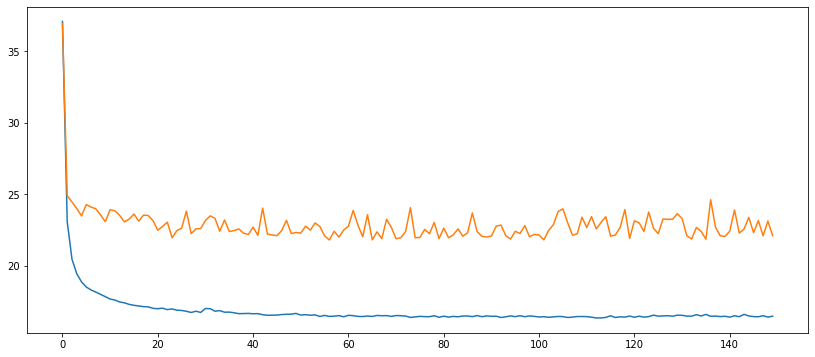

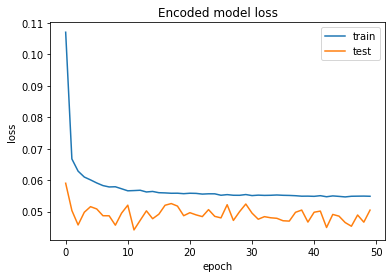

Overall accuracy of Convolutional Neural Network model: 0.9754222112987606


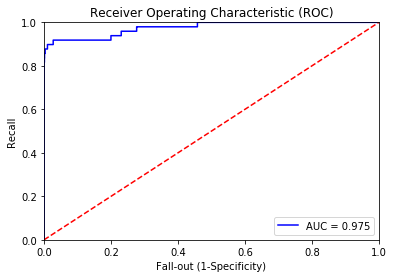

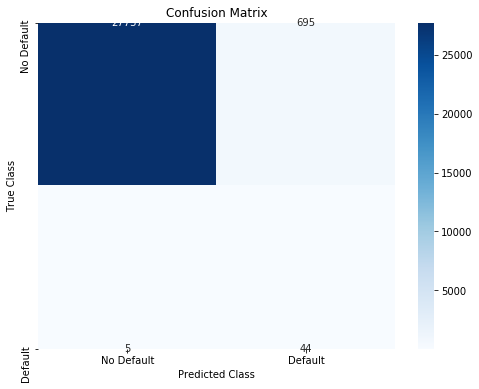

AUC(ROC): 0.9367574477737072
Precision: 0.05953991880920163
Recall: 0.8979591836734694
F1 score: 0.1116751269035533
False positives: 695
True positives: 44
False negatives: 5
True negatives: 27737
Fold #4
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511766, 30)
After OverSampling, the shape of train_y: (511766,) 

After OverSampling, counts of label '1': 255883
After OverSampling, counts of label '0': 255883
Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_28 (Dense)                (None, 27)           837         input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_34 (BatchNo (None, 27)           108         dense_28[0][0]                   
_____________________________________________________________________________________

511766/511766 [==============================] - 25s 49us/step - loss: 11.6213 - rec_loss: 18.1837 - kl_loss: 4.2351 - val_loss: 13.3976 - val_rec_loss: 23.7709 - val_kl_loss: 2.6875
Epoch 17/150
511766/511766 [==============================] - 25s 49us/step - loss: 11.5540 - rec_loss: 18.0565 - kl_loss: 4.2374 - val_loss: 13.9641 - val_rec_loss: 24.7266 - val_kl_loss: 2.8711
Epoch 18/150
511766/511766 [==============================] - 25s 49us/step - loss: 11.5224 - rec_loss: 17.9855 - kl_loss: 4.2438 - val_loss: 13.1743 - val_rec_loss: 23.1033 - val_kl_loss: 2.9132
Epoch 19/150
511766/511766 [==============================] - 25s 49us/step - loss: 11.4748 - rec_loss: 17.8966 - kl_loss: 4.2388 - val_loss: 13.3951 - val_rec_loss: 23.6324 - val_kl_loss: 2.8216
Epoch 20/150
511766/511766 [==============================] - 25s 49us/step - loss: 11.4985 - rec_loss: 17.9317 - kl_loss: 4.2455 - val_loss: 13.6661 - val_rec_loss: 24.1734 - val_kl_loss: 2.8179
Epoch 21/150
511766/511766 [=====

Epoch 58/150
511766/511766 [==============================] - 25s 49us/step - loss: 11.1995 - rec_loss: 17.2946 - kl_loss: 4.3367 - val_loss: 13.2044 - val_rec_loss: 23.1466 - val_kl_loss: 2.8835
Epoch 59/150
511766/511766 [==============================] - 25s 49us/step - loss: 11.1458 - rec_loss: 17.1921 - kl_loss: 4.3299 - val_loss: 12.9871 - val_rec_loss: 22.7290 - val_kl_loss: 2.8942
Epoch 60/150
511766/511766 [==============================] - 25s 49us/step - loss: 11.2020 - rec_loss: 17.3078 - kl_loss: 4.3298 - val_loss: 13.2919 - val_rec_loss: 23.3274 - val_kl_loss: 2.9023
Epoch 61/150
511766/511766 [==============================] - 25s 49us/step - loss: 11.1829 - rec_loss: 17.2643 - kl_loss: 4.3350 - val_loss: 13.1723 - val_rec_loss: 22.8492 - val_kl_loss: 3.1466
Epoch 62/150
511766/511766 [==============================] - 25s 49us/step - loss: 11.2019 - rec_loss: 17.3052 - kl_loss: 4.3320 - val_loss: 12.9230 - val_rec_loss: 22.5583 - val_kl_loss: 2.9448
Epoch 63/150
511766/

Epoch 100/150
511766/511766 [==============================] - 25s 49us/step - loss: 11.1315 - rec_loss: 17.2294 - kl_loss: 4.3183 - val_loss: 13.2089 - val_rec_loss: 23.2109 - val_kl_loss: 2.8725
Epoch 101/150
511766/511766 [==============================] - 25s 49us/step - loss: 11.0803 - rec_loss: 17.1158 - kl_loss: 4.3308 - val_loss: 13.3148 - val_rec_loss: 23.2718 - val_kl_loss: 3.0072
Epoch 102/150
511766/511766 [==============================] - 25s 49us/step - loss: 11.0954 - rec_loss: 17.1548 - kl_loss: 4.3281 - val_loss: 13.3125 - val_rec_loss: 23.0467 - val_kl_loss: 3.2379
Epoch 103/150
511766/511766 [==============================] - 25s 49us/step - loss: 11.1168 - rec_loss: 17.2042 - kl_loss: 4.3258 - val_loss: 13.1264 - val_rec_loss: 23.1113 - val_kl_loss: 2.8144
Epoch 104/150
511766/511766 [==============================] - 25s 49us/step - loss: 11.1584 - rec_loss: 17.2645 - kl_loss: 4.3423 - val_loss: 12.9077 - val_rec_loss: 22.5053 - val_kl_loss: 2.9819
Epoch 105/150
5

511766/511766 [==============================] - 25s 49us/step - loss: 11.1756 - rec_loss: 17.3105 - kl_loss: 4.3428 - val_loss: 13.5428 - val_rec_loss: 24.0137 - val_kl_loss: 2.7245
Epoch 142/150
511766/511766 [==============================] - 25s 49us/step - loss: 11.2067 - rec_loss: 17.3544 - kl_loss: 4.3525 - val_loss: 13.1611 - val_rec_loss: 22.9724 - val_kl_loss: 3.0176
Epoch 143/150
511766/511766 [==============================] - 25s 49us/step - loss: 11.1138 - rec_loss: 17.1930 - kl_loss: 4.3351 - val_loss: 13.3581 - val_rec_loss: 23.3453 - val_kl_loss: 3.0216
Epoch 144/150
511766/511766 [==============================] - 25s 49us/step - loss: 11.1056 - rec_loss: 17.1562 - kl_loss: 4.3408 - val_loss: 12.8383 - val_rec_loss: 22.3945 - val_kl_loss: 2.9312
Epoch 145/150
511766/511766 [==============================] - 25s 49us/step - loss: 11.1211 - rec_loss: 17.1843 - kl_loss: 4.3416 - val_loss: 13.4832 - val_rec_loss: 23.5641 - val_kl_loss: 3.0340
Epoch 146/150
511766/511766 [

Epoch 42/50
511766/511766 [==============================] - 92s 180us/step - loss: 0.0583 - accuracy: 0.9779 - val_loss: 0.0559 - val_accuracy: 0.9765
Epoch 43/50
511766/511766 [==============================] - 93s 182us/step - loss: 0.0586 - accuracy: 0.9781 - val_loss: 0.0558 - val_accuracy: 0.9761
Epoch 44/50
511766/511766 [==============================] - 93s 182us/step - loss: 0.0581 - accuracy: 0.9783 - val_loss: 0.0564 - val_accuracy: 0.9773
Epoch 45/50
511766/511766 [==============================] - 93s 182us/step - loss: 0.0581 - accuracy: 0.9779 - val_loss: 0.0582 - val_accuracy: 0.9752
Epoch 46/50
511766/511766 [==============================] - 93s 182us/step - loss: 0.0581 - accuracy: 0.9778 - val_loss: 0.0581 - val_accuracy: 0.9752
Epoch 47/50
511766/511766 [==============================] - 92s 179us/step - loss: 0.0582 - accuracy: 0.9780 - val_loss: 0.0533 - val_accuracy: 0.9775
Epoch 48/50
511766/511766 [==============================] - 94s 183us/step - loss: 0.05

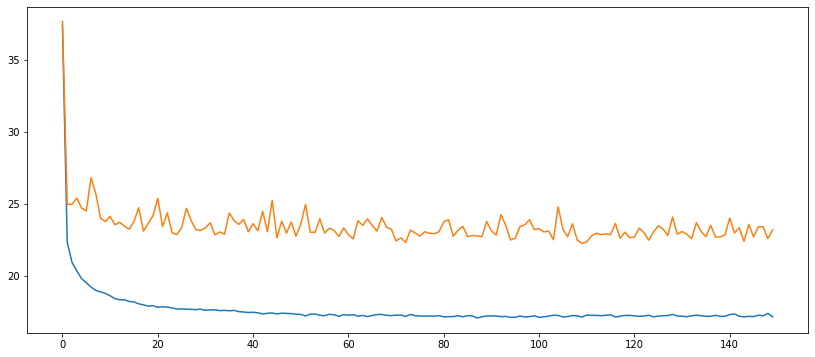

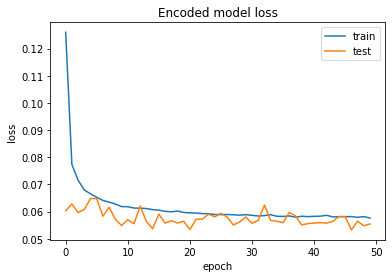

Overall accuracy of Convolutional Neural Network model: 0.9761946560865138


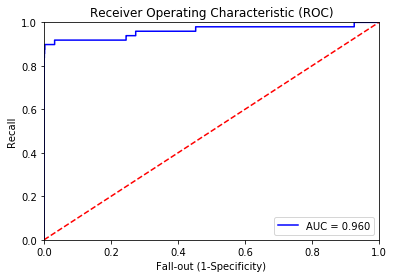

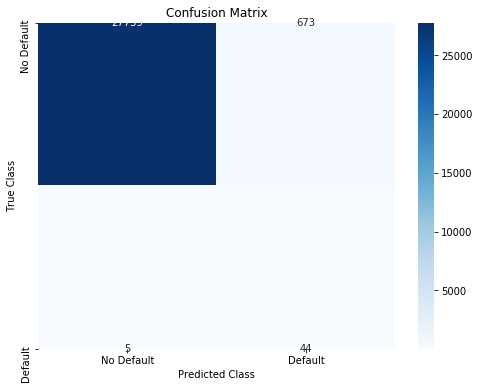

AUC(ROC): 0.937144335787213
Precision: 0.061366806136680614
Recall: 0.8979591836734694
F1 score: 0.11488250652741513
False positives: 673
True positives: 44
False negatives: 5
True negatives: 27759
Fold #5
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511766, 30)
After OverSampling, the shape of train_y: (511766,) 

After OverSampling, counts of label '1': 255883
After OverSampling, counts of label '0': 255883
Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_37 (Dense)                (None, 27)           837         input_9[0][0]                    
__________________________________________________________________________________________________
batch_normalization_45 (BatchNo (None, 27)           108         dense_37[0][0]                   
_____________________________________________________________________________________

511766/511766 [==============================] - 26s 51us/step - loss: 11.5919 - rec_loss: 17.8197 - kl_loss: 4.3893 - val_loss: 13.9662 - val_rec_loss: 24.1592 - val_kl_loss: 3.2675
Epoch 17/150
511766/511766 [==============================] - 25s 49us/step - loss: 11.5044 - rec_loss: 17.6894 - kl_loss: 4.3689 - val_loss: 13.4050 - val_rec_loss: 23.1964 - val_kl_loss: 3.1295
Epoch 18/150
511766/511766 [==============================] - 25s 49us/step - loss: 11.4483 - rec_loss: 17.6146 - kl_loss: 4.3443 - val_loss: 13.5773 - val_rec_loss: 23.3685 - val_kl_loss: 3.3169
Epoch 19/150
511766/511766 [==============================] - 26s 50us/step - loss: 11.3378 - rec_loss: 17.4111 - kl_loss: 4.3365 - val_loss: 13.9597 - val_rec_loss: 24.3297 - val_kl_loss: 3.1196
Epoch 20/150
511766/511766 [==============================] - 26s 51us/step - loss: 11.3043 - rec_loss: 17.3492 - kl_loss: 4.3332 - val_loss: 13.9596 - val_rec_loss: 24.2328 - val_kl_loss: 3.2141
Epoch 21/150
511766/511766 [=====

Epoch 58/150
511766/511766 [==============================] - 25s 48us/step - loss: 10.8781 - rec_loss: 16.6338 - kl_loss: 4.3289 - val_loss: 13.6728 - val_rec_loss: 23.6366 - val_kl_loss: 3.3051
Epoch 59/150
511766/511766 [==============================] - 25s 48us/step - loss: 10.9272 - rec_loss: 16.7497 - kl_loss: 4.3163 - val_loss: 13.6116 - val_rec_loss: 23.7459 - val_kl_loss: 3.0879
Epoch 60/150
511766/511766 [==============================] - 25s 48us/step - loss: 10.8607 - rec_loss: 16.5998 - kl_loss: 4.3317 - val_loss: 13.4711 - val_rec_loss: 23.3354 - val_kl_loss: 3.1825
Epoch 61/150
511766/511766 [==============================] - 25s 48us/step - loss: 10.8670 - rec_loss: 16.6147 - kl_loss: 4.3289 - val_loss: 13.3280 - val_rec_loss: 23.2199 - val_kl_loss: 3.0509
Epoch 62/150
511766/511766 [==============================] - 25s 48us/step - loss: 10.9204 - rec_loss: 16.7079 - kl_loss: 4.3374 - val_loss: 13.4471 - val_rec_loss: 23.3988 - val_kl_loss: 3.0989
Epoch 63/150
511766/

Epoch 100/150
511766/511766 [==============================] - 25s 49us/step - loss: 10.7965 - rec_loss: 16.4431 - kl_loss: 4.3384 - val_loss: 13.2962 - val_rec_loss: 23.0522 - val_kl_loss: 3.1166
Epoch 101/150
511766/511766 [==============================] - 25s 49us/step - loss: 10.8232 - rec_loss: 16.4857 - kl_loss: 4.3478 - val_loss: 13.3743 - val_rec_loss: 23.0514 - val_kl_loss: 3.2849
Epoch 102/150
511766/511766 [==============================] - 25s 49us/step - loss: 10.7886 - rec_loss: 16.4491 - kl_loss: 4.3241 - val_loss: 13.3938 - val_rec_loss: 23.1332 - val_kl_loss: 3.2154
Epoch 103/150
511766/511766 [==============================] - 25s 49us/step - loss: 10.8487 - rec_loss: 16.5463 - kl_loss: 4.3395 - val_loss: 13.2243 - val_rec_loss: 22.8743 - val_kl_loss: 3.1620
Epoch 104/150
511766/511766 [==============================] - 25s 49us/step - loss: 10.8721 - rec_loss: 16.5997 - kl_loss: 4.3361 - val_loss: 13.0683 - val_rec_loss: 22.4302 - val_kl_loss: 3.2797
Epoch 105/150
5

511766/511766 [==============================] - 25s 49us/step - loss: 10.8136 - rec_loss: 16.4833 - kl_loss: 4.3440 - val_loss: 13.2713 - val_rec_loss: 23.0486 - val_kl_loss: 3.0981
Epoch 142/150
511766/511766 [==============================] - 25s 49us/step - loss: 10.7598 - rec_loss: 16.3887 - kl_loss: 4.3349 - val_loss: 13.3478 - val_rec_loss: 22.9463 - val_kl_loss: 3.3504
Epoch 143/150
511766/511766 [==============================] - 25s 49us/step - loss: 10.7867 - rec_loss: 16.4423 - kl_loss: 4.3294 - val_loss: 13.3484 - val_rec_loss: 23.0653 - val_kl_loss: 3.2174
Epoch 144/150
511766/511766 [==============================] - 25s 49us/step - loss: 10.7461 - rec_loss: 16.3699 - kl_loss: 4.3278 - val_loss: 13.1824 - val_rec_loss: 22.6796 - val_kl_loss: 3.2716
Epoch 145/150
511766/511766 [==============================] - 25s 49us/step - loss: 10.7420 - rec_loss: 16.3589 - kl_loss: 4.3309 - val_loss: 13.1839 - val_rec_loss: 22.8643 - val_kl_loss: 3.0999
Epoch 146/150
511766/511766 [

Epoch 42/50
511766/511766 [==============================] - 89s 174us/step - loss: 0.0516 - accuracy: 0.9815 - val_loss: 0.0573 - val_accuracy: 0.9879
Epoch 43/50
511766/511766 [==============================] - 89s 174us/step - loss: 0.0517 - accuracy: 0.9814 - val_loss: 0.0570 - val_accuracy: 0.9871
Epoch 44/50
511766/511766 [==============================] - 89s 174us/step - loss: 0.0520 - accuracy: 0.9815 - val_loss: 0.0528 - val_accuracy: 0.9883
Epoch 45/50
511766/511766 [==============================] - 102s 199us/step - loss: 0.0518 - accuracy: 0.9816 - val_loss: 0.0535 - val_accuracy: 0.9887
Epoch 46/50
511766/511766 [==============================] - 100s 195us/step - loss: 0.0518 - accuracy: 0.9814 - val_loss: 0.0552 - val_accuracy: 0.9876
Epoch 47/50
511766/511766 [==============================] - 98s 192us/step - loss: 0.0516 - accuracy: 0.9815 - val_loss: 0.0533 - val_accuracy: 0.9890
Epoch 48/50
511766/511766 [==============================] - 97s 190us/step - loss: 0.

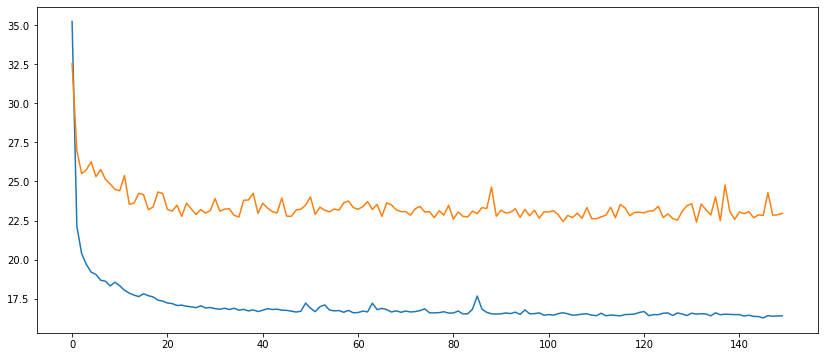

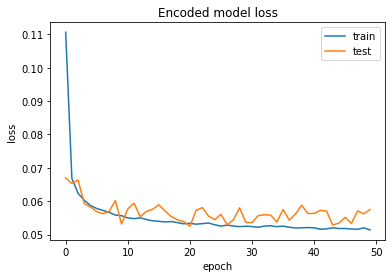

Overall accuracy of Convolutional Neural Network model: 0.986903549734911


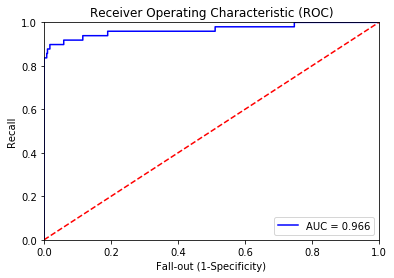

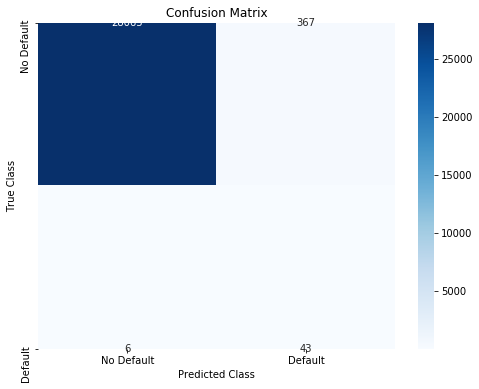

AUC(ROC): 0.9323215147060512
Precision: 0.1048780487804878
Recall: 0.8775510204081632
F1 score: 0.18736383442265794
False positives: 367
True positives: 43
False negatives: 6
True negatives: 28065
Fold #6
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511768, 30)
After OverSampling, the shape of train_y: (511768,) 

After OverSampling, counts of label '1': 255884
After OverSampling, counts of label '0': 255884
Model: "model_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           (None, 30)           0                                            
__________________________________________________________________________________________________
dense_46 (Dense)                (None, 27)           837         input_11[0][0]                   
__________________________________________________________________________________________________
batch_normalization_56 (BatchNo (None, 27)           108         dense_46[0][0]                   
____________________________________________________________________________________

511768/511768 [==============================] - 25s 49us/step - loss: 11.7214 - rec_loss: 18.2215 - kl_loss: 4.2189 - val_loss: 13.2962 - val_rec_loss: 23.1735 - val_kl_loss: 2.9542
Epoch 17/150
511768/511768 [==============================] - 25s 49us/step - loss: 11.6867 - rec_loss: 18.1573 - kl_loss: 4.2212 - val_loss: 13.4519 - val_rec_loss: 23.5335 - val_kl_loss: 2.9244
Epoch 18/150
511768/511768 [==============================] - 25s 50us/step - loss: 11.9666 - rec_loss: 18.7001 - kl_loss: 4.2423 - val_loss: 13.8113 - val_rec_loss: 24.1446 - val_kl_loss: 3.0094
Epoch 19/150
511768/511768 [==============================] - 25s 50us/step - loss: 11.5795 - rec_loss: 17.9774 - kl_loss: 4.2383 - val_loss: 13.4580 - val_rec_loss: 23.4548 - val_kl_loss: 3.0204
Epoch 20/150
511768/511768 [==============================] - 25s 49us/step - loss: 11.6595 - rec_loss: 18.1147 - kl_loss: 4.2653 - val_loss: 13.5117 - val_rec_loss: 23.5164 - val_kl_loss: 3.0421
Epoch 21/150
511768/511768 [=====

Epoch 58/150
511768/511768 [==============================] - 27s 53us/step - loss: 11.2239 - rec_loss: 17.3042 - kl_loss: 4.2916 - val_loss: 13.2799 - val_rec_loss: 22.9616 - val_kl_loss: 3.1732
Epoch 59/150
511768/511768 [==============================] - 27s 53us/step - loss: 11.2346 - rec_loss: 17.3375 - kl_loss: 4.2842 - val_loss: 13.3479 - val_rec_loss: 23.2442 - val_kl_loss: 3.0137
Epoch 60/150
511768/511768 [==============================] - 28s 55us/step - loss: 11.2557 - rec_loss: 17.3576 - kl_loss: 4.3019 - val_loss: 13.1505 - val_rec_loss: 22.8415 - val_kl_loss: 3.0283
Epoch 61/150
511768/511768 [==============================] - 28s 55us/step - loss: 11.2216 - rec_loss: 17.2798 - kl_loss: 4.3094 - val_loss: 13.2102 - val_rec_loss: 22.8643 - val_kl_loss: 3.1258
Epoch 62/150
511768/511768 [==============================] - 28s 55us/step - loss: 11.2045 - rec_loss: 17.2582 - kl_loss: 4.3016 - val_loss: 13.0605 - val_rec_loss: 22.6536 - val_kl_loss: 3.0538
Epoch 63/150
511768/

Epoch 100/150
511768/511768 [==============================] - 27s 52us/step - loss: 11.6245 - rec_loss: 18.0054 - kl_loss: 4.3627 - val_loss: 13.6713 - val_rec_loss: 23.8089 - val_kl_loss: 3.0881
Epoch 101/150
511768/511768 [==============================] - 27s 52us/step - loss: 11.5241 - rec_loss: 17.8446 - kl_loss: 4.3406 - val_loss: 13.7647 - val_rec_loss: 24.1211 - val_kl_loss: 2.9783
Epoch 102/150
511768/511768 [==============================] - 27s 52us/step - loss: 11.4035 - rec_loss: 17.6500 - kl_loss: 4.3048 - val_loss: 13.2856 - val_rec_loss: 23.0936 - val_kl_loss: 3.0492
Epoch 103/150
511768/511768 [==============================] - 27s 52us/step - loss: 11.3443 - rec_loss: 17.5355 - kl_loss: 4.3078 - val_loss: 13.3852 - val_rec_loss: 23.3826 - val_kl_loss: 2.9708
Epoch 104/150
511768/511768 [==============================] - 27s 52us/step - loss: 11.3382 - rec_loss: 17.5365 - kl_loss: 4.2928 - val_loss: 13.3613 - val_rec_loss: 23.0866 - val_kl_loss: 3.1995
Epoch 105/150
5

511768/511768 [==============================] - 26s 51us/step - loss: 11.1205 - rec_loss: 17.1627 - kl_loss: 4.2614 - val_loss: 13.5914 - val_rec_loss: 23.6611 - val_kl_loss: 3.1114
Epoch 142/150
511768/511768 [==============================] - 26s 51us/step - loss: 13.1197 - rec_loss: 20.9599 - kl_loss: 4.4043 - val_loss: 13.5144 - val_rec_loss: 23.4769 - val_kl_loss: 3.1185
Epoch 143/150
511768/511768 [==============================] - 26s 51us/step - loss: 11.6330 - rec_loss: 18.1403 - kl_loss: 4.2733 - val_loss: 13.2585 - val_rec_loss: 22.9794 - val_kl_loss: 3.1230
Epoch 144/150
511768/511768 [==============================] - 27s 53us/step - loss: 11.4765 - rec_loss: 17.8641 - kl_loss: 4.2550 - val_loss: 13.9213 - val_rec_loss: 24.2324 - val_kl_loss: 3.1779
Epoch 145/150
511768/511768 [==============================] - 27s 53us/step - loss: 11.3993 - rec_loss: 17.7127 - kl_loss: 4.2551 - val_loss: 13.6316 - val_rec_loss: 23.7301 - val_kl_loss: 3.1095
Epoch 146/150
511768/511768 [

511768/511768 [==============================] - 89s 174us/step - loss: 0.0520 - accuracy: 0.9818 - val_loss: 0.0565 - val_accuracy: 0.9807
Epoch 42/50
511768/511768 [==============================] - 89s 174us/step - loss: 0.0523 - accuracy: 0.9819 - val_loss: 0.0587 - val_accuracy: 0.9801
Epoch 43/50
511768/511768 [==============================] - 89s 174us/step - loss: 0.0524 - accuracy: 0.9818 - val_loss: 0.0538 - val_accuracy: 0.9822
Epoch 44/50
511768/511768 [==============================] - 89s 174us/step - loss: 0.0520 - accuracy: 0.9819 - val_loss: 0.0551 - val_accuracy: 0.9808
Epoch 45/50
511768/511768 [==============================] - 89s 174us/step - loss: 0.0519 - accuracy: 0.9820 - val_loss: 0.0521 - val_accuracy: 0.9831
Epoch 46/50
511768/511768 [==============================] - 89s 174us/step - loss: 0.0518 - accuracy: 0.9819 - val_loss: 0.0552 - val_accuracy: 0.9816
Epoch 47/50
511768/511768 [==============================] - 89s 174us/step - loss: 0.0516 - accurac

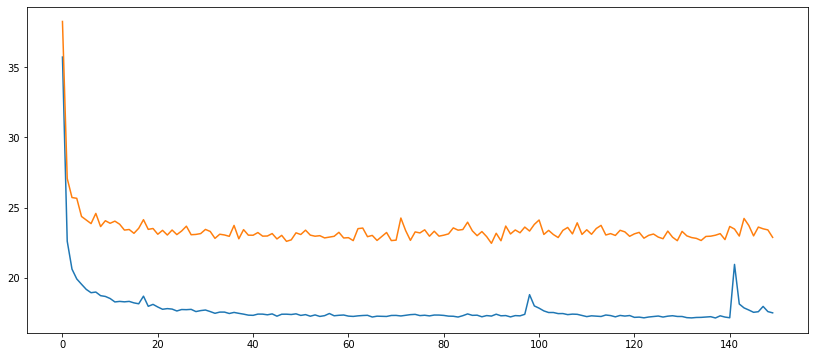

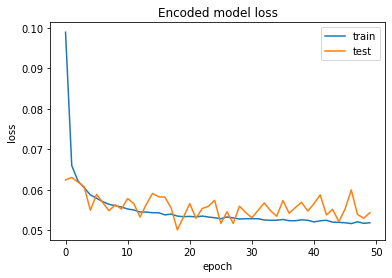

Overall accuracy of Convolutional Neural Network model: 0.9811102138267617


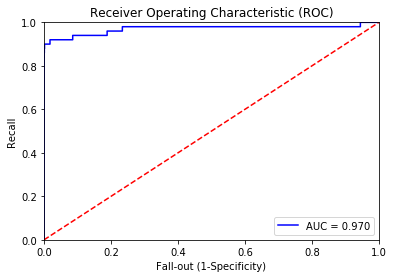

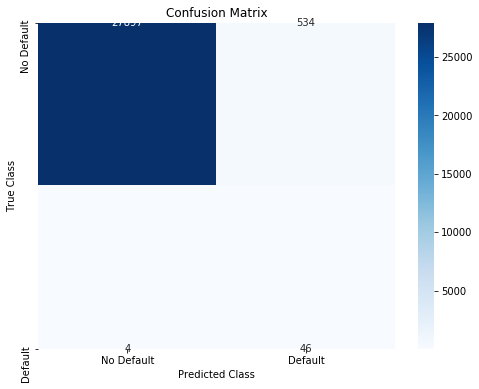

AUC(ROC): 0.9506088424606942
Precision: 0.07931034482758621
Recall: 0.92
F1 score: 0.146031746031746
False positives: 534
True positives: 46
False negatives: 4
True negatives: 27897
Fold #7
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511768, 30)
After OverSampling, the shape of train_y: (511768,) 

After OverSampling, counts of label '1': 255884
After OverSampling, counts of label '0': 255884
Model: "model_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           (None, 30)           0                                            
__________________________________________________________________________________________________
dense_55 (Dense)                (None, 27)           837         input_13[0][0]                   
__________________________________________________________________________________________________
batch_normalization_67 (BatchNo (None, 27)           108         dense_55[0][0]                   
____________________________________________________________________________________

511768/511768 [==============================] - 25s 50us/step - loss: 11.5643 - rec_loss: 18.2279 - kl_loss: 4.1500 - val_loss: 13.5933 - val_rec_loss: 24.0990 - val_kl_loss: 2.7035
Epoch 17/150
511768/511768 [==============================] - 25s 50us/step - loss: 11.6074 - rec_loss: 18.3232 - kl_loss: 4.1543 - val_loss: 13.6051 - val_rec_loss: 24.0981 - val_kl_loss: 2.7261
Epoch 18/150
511768/511768 [==============================] - 25s 49us/step - loss: 11.5582 - rec_loss: 18.2268 - kl_loss: 4.1537 - val_loss: 13.5164 - val_rec_loss: 23.9093 - val_kl_loss: 2.7336
Epoch 19/150
511768/511768 [==============================] - 25s 49us/step - loss: 11.5057 - rec_loss: 18.1213 - kl_loss: 4.1547 - val_loss: 13.6102 - val_rec_loss: 24.0937 - val_kl_loss: 2.7524
Epoch 20/150
511768/511768 [==============================] - 25s 49us/step - loss: 11.4645 - rec_loss: 18.0316 - kl_loss: 4.1612 - val_loss: 13.5738 - val_rec_loss: 23.8716 - val_kl_loss: 2.8932
Epoch 21/150
511768/511768 [=====

Epoch 58/150
511768/511768 [==============================] - 25s 49us/step - loss: 10.9610 - rec_loss: 17.0091 - kl_loss: 4.2708 - val_loss: 13.2926 - val_rec_loss: 23.4037 - val_kl_loss: 2.8389
Epoch 59/150
511768/511768 [==============================] - 25s 49us/step - loss: 11.0003 - rec_loss: 17.0764 - kl_loss: 4.2824 - val_loss: 13.5120 - val_rec_loss: 23.9520 - val_kl_loss: 2.7312
Epoch 60/150
511768/511768 [==============================] - 25s 49us/step - loss: 10.9750 - rec_loss: 17.0330 - kl_loss: 4.2784 - val_loss: 13.2586 - val_rec_loss: 23.2177 - val_kl_loss: 2.9502
Epoch 61/150
511768/511768 [==============================] - 25s 49us/step - loss: 11.0011 - rec_loss: 17.0811 - kl_loss: 4.2738 - val_loss: 13.5222 - val_rec_loss: 23.8508 - val_kl_loss: 2.8602
Epoch 62/150
511768/511768 [==============================] - 25s 49us/step - loss: 11.0012 - rec_loss: 17.0713 - kl_loss: 4.2819 - val_loss: 13.6964 - val_rec_loss: 24.1230 - val_kl_loss: 2.9135
Epoch 63/150
511768/

Epoch 100/150
511768/511768 [==============================] - 25s 49us/step - loss: 10.8752 - rec_loss: 16.8610 - kl_loss: 4.2691 - val_loss: 12.9456 - val_rec_loss: 22.6100 - val_kl_loss: 2.9611
Epoch 101/150
511768/511768 [==============================] - 25s 49us/step - loss: 10.8734 - rec_loss: 16.8401 - kl_loss: 4.2801 - val_loss: 12.8328 - val_rec_loss: 22.4605 - val_kl_loss: 2.8827
Epoch 102/150
511768/511768 [==============================] - 25s 49us/step - loss: 10.9117 - rec_loss: 16.9249 - kl_loss: 4.2678 - val_loss: 13.5250 - val_rec_loss: 23.8005 - val_kl_loss: 2.9111
Epoch 103/150
511768/511768 [==============================] - 25s 49us/step - loss: 10.8575 - rec_loss: 16.8094 - kl_loss: 4.2775 - val_loss: 12.9590 - val_rec_loss: 22.7931 - val_kl_loss: 2.8011
Epoch 104/150
511768/511768 [==============================] - 25s 49us/step - loss: 10.8601 - rec_loss: 16.8263 - kl_loss: 4.2711 - val_loss: 13.0250 - val_rec_loss: 22.7580 - val_kl_loss: 2.9525
Epoch 105/150
5

511768/511768 [==============================] - 25s 50us/step - loss: 10.8797 - rec_loss: 16.8763 - kl_loss: 4.2660 - val_loss: 13.1321 - val_rec_loss: 23.0520 - val_kl_loss: 2.8847
Epoch 142/150
511768/511768 [==============================] - 25s 49us/step - loss: 10.8861 - rec_loss: 16.8744 - kl_loss: 4.2761 - val_loss: 13.1748 - val_rec_loss: 23.0974 - val_kl_loss: 2.9268
Epoch 143/150
511768/511768 [==============================] - 25s 50us/step - loss: 10.8538 - rec_loss: 16.8102 - kl_loss: 4.2763 - val_loss: 13.0096 - val_rec_loss: 22.6919 - val_kl_loss: 2.9767
Epoch 144/150
511768/511768 [==============================] - 25s 49us/step - loss: 10.8511 - rec_loss: 16.7950 - kl_loss: 4.2880 - val_loss: 13.1957 - val_rec_loss: 23.0206 - val_kl_loss: 3.0289
Epoch 145/150
511768/511768 [==============================] - 25s 50us/step - loss: 10.8601 - rec_loss: 16.8235 - kl_loss: 4.2760 - val_loss: 13.1985 - val_rec_loss: 22.8267 - val_kl_loss: 3.2111
Epoch 146/150
511768/511768 [

Epoch 42/50
511768/511768 [==============================] - 91s 178us/step - loss: 0.0439 - accuracy: 0.9843 - val_loss: 0.0453 - val_accuracy: 0.9828
Epoch 43/50
511768/511768 [==============================] - 91s 178us/step - loss: 0.0441 - accuracy: 0.9845 - val_loss: 0.0439 - val_accuracy: 0.9838
Epoch 44/50
511768/511768 [==============================] - 91s 178us/step - loss: 0.0438 - accuracy: 0.9846 - val_loss: 0.0505 - val_accuracy: 0.9810
Epoch 45/50
511768/511768 [==============================] - 91s 178us/step - loss: 0.0441 - accuracy: 0.9844 - val_loss: 0.0493 - val_accuracy: 0.9798
Epoch 46/50
511768/511768 [==============================] - 91s 178us/step - loss: 0.0437 - accuracy: 0.9846 - val_loss: 0.0431 - val_accuracy: 0.9836
Epoch 47/50
511768/511768 [==============================] - 91s 178us/step - loss: 0.0439 - accuracy: 0.9845 - val_loss: 0.0471 - val_accuracy: 0.9813
Epoch 48/50
511768/511768 [==============================] - 91s 178us/step - loss: 0.04

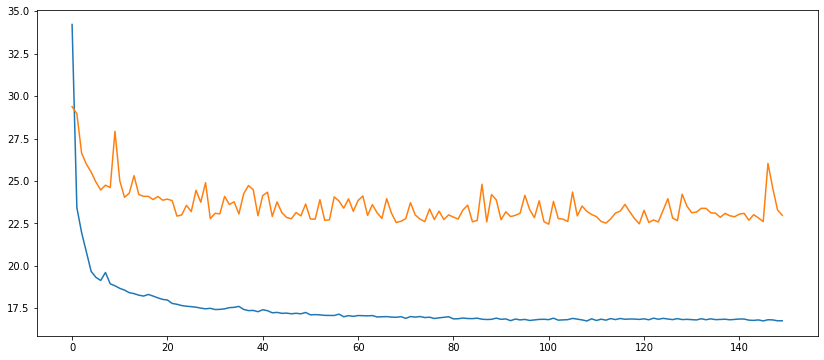

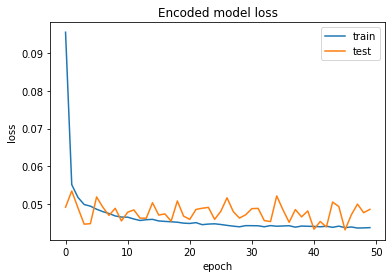

Overall accuracy of Convolutional Neural Network model: 0.9810751027000456


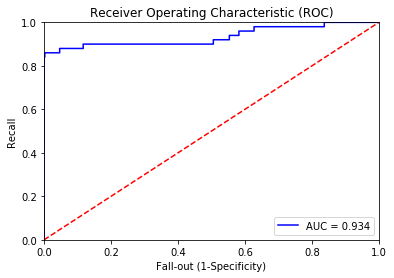

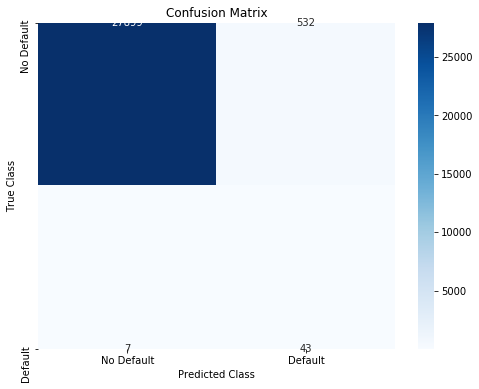

AUC(ROC): 0.9206440153353733
Precision: 0.07478260869565218
Recall: 0.86
F1 score: 0.13760000000000003
False positives: 532
True positives: 43
False negatives: 7
True negatives: 27899
Fold #8
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511768, 30)
After OverSampling, the shape of train_y: (511768,) 

After OverSampling, counts of label '1': 255884
After OverSampling, counts of label '0': 255884
Model: "model_15"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           (None, 30)           0                                            
__________________________________________________________________________________________________
dense_64 (Dense)                (None, 27)           837         input_15[0][0]                   
__________________________________________________________________________________________________
batch_normalization_78 (BatchNo (None, 27)           108         dense_64[0][0]                   
____________________________________________________________________________________

511768/511768 [==============================] - 26s 50us/step - loss: 11.6017 - rec_loss: 18.0451 - kl_loss: 4.2015 - val_loss: 13.8450 - val_rec_loss: 24.4389 - val_kl_loss: 2.8614
Epoch 17/150
511768/511768 [==============================] - 26s 50us/step - loss: 11.5716 - rec_loss: 17.9901 - kl_loss: 4.1970 - val_loss: 13.8269 - val_rec_loss: 24.4781 - val_kl_loss: 2.7802
Epoch 18/150
511768/511768 [==============================] - 26s 50us/step - loss: 11.5708 - rec_loss: 17.9855 - kl_loss: 4.2053 - val_loss: 13.1270 - val_rec_loss: 23.0404 - val_kl_loss: 2.8443
Epoch 19/150
511768/511768 [==============================] - 26s 50us/step - loss: 11.5401 - rec_loss: 17.9119 - kl_loss: 4.2163 - val_loss: 13.5065 - val_rec_loss: 23.8357 - val_kl_loss: 2.7926
Epoch 20/150
511768/511768 [==============================] - 26s 50us/step - loss: 11.4942 - rec_loss: 17.8067 - kl_loss: 4.2277 - val_loss: 13.1742 - val_rec_loss: 23.0222 - val_kl_loss: 2.9482
Epoch 21/150
511768/511768 [=====

Epoch 58/150
511768/511768 [==============================] - 25s 50us/step - loss: 11.0963 - rec_loss: 17.1195 - kl_loss: 4.2419 - val_loss: 13.1644 - val_rec_loss: 22.8825 - val_kl_loss: 3.0912
Epoch 59/150
511768/511768 [==============================] - 26s 50us/step - loss: 11.1598 - rec_loss: 17.2553 - kl_loss: 4.2443 - val_loss: 13.0416 - val_rec_loss: 22.7135 - val_kl_loss: 3.0192
Epoch 60/150
511768/511768 [==============================] - 25s 50us/step - loss: 11.1593 - rec_loss: 17.2466 - kl_loss: 4.2479 - val_loss: 13.1078 - val_rec_loss: 22.8624 - val_kl_loss: 3.0067
Epoch 61/150
511768/511768 [==============================] - 26s 50us/step - loss: 11.0770 - rec_loss: 17.1027 - kl_loss: 4.2359 - val_loss: 13.0254 - val_rec_loss: 22.7541 - val_kl_loss: 2.9483
Epoch 62/150
511768/511768 [==============================] - 26s 50us/step - loss: 11.0856 - rec_loss: 17.1211 - kl_loss: 4.2352 - val_loss: 13.0969 - val_rec_loss: 22.8511 - val_kl_loss: 3.0135
Epoch 63/150
511768/

Epoch 100/150
511768/511768 [==============================] - 26s 50us/step - loss: 11.0668 - rec_loss: 17.0920 - kl_loss: 4.2569 - val_loss: 13.1307 - val_rec_loss: 22.8928 - val_kl_loss: 3.0181
Epoch 101/150
511768/511768 [==============================] - 25s 50us/step - loss: 11.0381 - rec_loss: 17.0532 - kl_loss: 4.2558 - val_loss: 12.9329 - val_rec_loss: 22.4394 - val_kl_loss: 3.0759
Epoch 102/150
511768/511768 [==============================] - 26s 50us/step - loss: 11.1702 - rec_loss: 17.2806 - kl_loss: 4.2891 - val_loss: 12.8302 - val_rec_loss: 22.3131 - val_kl_loss: 3.0092
Epoch 103/150
511768/511768 [==============================] - 26s 50us/step - loss: 11.0387 - rec_loss: 17.0522 - kl_loss: 4.2640 - val_loss: 13.0630 - val_rec_loss: 22.7693 - val_kl_loss: 3.0218
Epoch 104/150
511768/511768 [==============================] - 26s 50us/step - loss: 11.0932 - rec_loss: 17.1672 - kl_loss: 4.2619 - val_loss: 12.9223 - val_rec_loss: 22.3077 - val_kl_loss: 3.2058
Epoch 105/150
5

511768/511768 [==============================] - 25s 50us/step - loss: 11.0577 - rec_loss: 17.0781 - kl_loss: 4.3012 - val_loss: 13.1978 - val_rec_loss: 23.2105 - val_kl_loss: 2.8660
Epoch 142/150
511768/511768 [==============================] - 25s 50us/step - loss: 10.9671 - rec_loss: 16.9099 - kl_loss: 4.2942 - val_loss: 13.0643 - val_rec_loss: 22.9435 - val_kl_loss: 2.8817
Epoch 143/150
511768/511768 [==============================] - 25s 50us/step - loss: 10.9357 - rec_loss: 16.8432 - kl_loss: 4.3017 - val_loss: 13.0015 - val_rec_loss: 22.7260 - val_kl_loss: 2.9641
Epoch 144/150
511768/511768 [==============================] - 25s 50us/step - loss: 11.0249 - rec_loss: 17.0099 - kl_loss: 4.3007 - val_loss: 12.9988 - val_rec_loss: 22.5935 - val_kl_loss: 3.0805
Epoch 145/150
511768/511768 [==============================] - 25s 50us/step - loss: 10.9940 - rec_loss: 16.9505 - kl_loss: 4.2998 - val_loss: 12.8506 - val_rec_loss: 22.2634 - val_kl_loss: 3.1300
Epoch 146/150
511768/511768 [

Epoch 42/50
511768/511768 [==============================] - 92s 179us/step - loss: 0.0616 - accuracy: 0.9767 - val_loss: 0.0625 - val_accuracy: 0.9719
Epoch 43/50
511768/511768 [==============================] - 92s 180us/step - loss: 0.0616 - accuracy: 0.9766 - val_loss: 0.0599 - val_accuracy: 0.9725
Epoch 44/50
511768/511768 [==============================] - 92s 180us/step - loss: 0.0618 - accuracy: 0.9768 - val_loss: 0.0607 - val_accuracy: 0.9724
Epoch 45/50
511768/511768 [==============================] - 92s 180us/step - loss: 0.0614 - accuracy: 0.9767 - val_loss: 0.0577 - val_accuracy: 0.9741
Epoch 46/50
511768/511768 [==============================] - 91s 178us/step - loss: 0.0616 - accuracy: 0.9768 - val_loss: 0.0599 - val_accuracy: 0.9753
Epoch 47/50
511768/511768 [==============================] - 91s 178us/step - loss: 0.0617 - accuracy: 0.9766 - val_loss: 0.0580 - val_accuracy: 0.9759
Epoch 48/50
511768/511768 [==============================] - 91s 178us/step - loss: 0.06

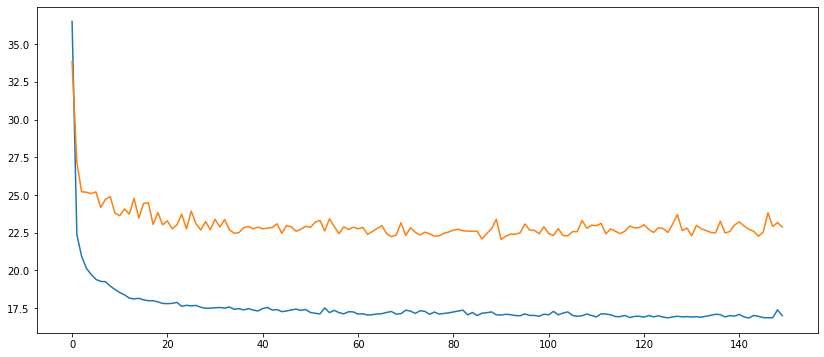

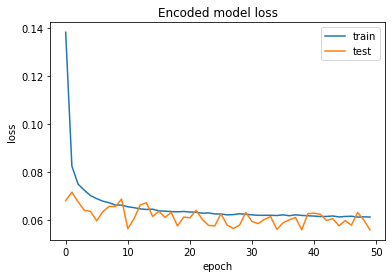

Overall accuracy of Convolutional Neural Network model: 0.9765449438202247


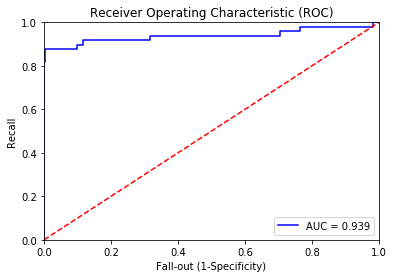

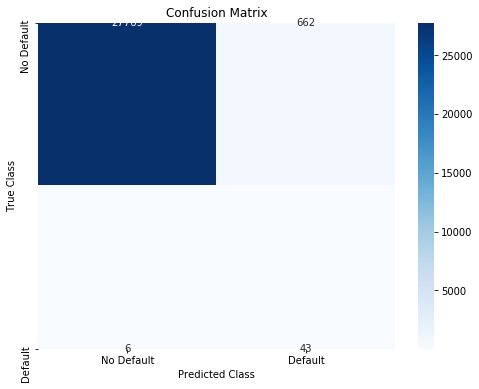

AUC(ROC): 0.9271332886853169
Precision: 0.06099290780141844
Recall: 0.8775510204081632
F1 score: 0.11405835543766579
False positives: 662
True positives: 43
False negatives: 6
True negatives: 27769
Fold #9
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511768, 30)
After OverSampling, the shape of train_y: (511768,) 

After OverSampling, counts of label '1': 255884
After OverSampling, counts of label '0': 255884
Model: "model_17"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           (None, 30)           0                                            
__________________________________________________________________________________________________
dense_73 (Dense)                (None, 27)           837         input_17[0][0]                   
__________________________________________________________________________________________________
batch_normalization_89 (BatchNo (None, 27)           108         dense_73[0][0]                   
____________________________________________________________________________________

511768/511768 [==============================] - 26s 50us/step - loss: 10.9148 - rec_loss: 17.0319 - kl_loss: 3.9509 - val_loss: 13.7774 - val_rec_loss: 24.0128 - val_kl_loss: 3.0876
Epoch 17/150
511768/511768 [==============================] - 26s 50us/step - loss: 10.9098 - rec_loss: 17.0164 - kl_loss: 3.9653 - val_loss: 13.8108 - val_rec_loss: 24.3087 - val_kl_loss: 2.8693
Epoch 18/150
511768/511768 [==============================] - 26s 50us/step - loss: 10.9904 - rec_loss: 17.1847 - kl_loss: 3.9767 - val_loss: 14.2651 - val_rec_loss: 24.9294 - val_kl_loss: 3.1677
Epoch 19/150
511768/511768 [==============================] - 26s 50us/step - loss: 10.8256 - rec_loss: 16.8928 - kl_loss: 3.9613 - val_loss: 13.4903 - val_rec_loss: 23.6962 - val_kl_loss: 2.8835
Epoch 20/150
511768/511768 [==============================] - 26s 50us/step - loss: 10.7607 - rec_loss: 16.7733 - kl_loss: 3.9571 - val_loss: 13.4990 - val_rec_loss: 23.8836 - val_kl_loss: 2.7091
Epoch 21/150
511768/511768 [=====

Epoch 58/150
511768/511768 [==============================] - 26s 50us/step - loss: 10.5911 - rec_loss: 16.5087 - kl_loss: 4.0073 - val_loss: 13.2150 - val_rec_loss: 22.9301 - val_kl_loss: 3.1395
Epoch 59/150
511768/511768 [==============================] - 26s 50us/step - loss: 10.5902 - rec_loss: 16.5107 - kl_loss: 4.0067 - val_loss: 13.1452 - val_rec_loss: 23.0413 - val_kl_loss: 2.9011
Epoch 60/150
511768/511768 [==============================] - 26s 50us/step - loss: 10.6826 - rec_loss: 16.6707 - kl_loss: 4.0261 - val_loss: 13.1423 - val_rec_loss: 22.8760 - val_kl_loss: 3.0405
Epoch 61/150
511768/511768 [==============================] - 26s 50us/step - loss: 10.5919 - rec_loss: 16.5026 - kl_loss: 4.0120 - val_loss: 13.4373 - val_rec_loss: 23.6797 - val_kl_loss: 2.8332
Epoch 62/150
511768/511768 [==============================] - 26s 50us/step - loss: 10.5324 - rec_loss: 16.3905 - kl_loss: 4.0063 - val_loss: 13.4546 - val_rec_loss: 23.5495 - val_kl_loss: 2.9926
Epoch 63/150
511768/

Epoch 100/150
511768/511768 [==============================] - 26s 50us/step - loss: 10.6752 - rec_loss: 16.6346 - kl_loss: 4.0597 - val_loss: 13.7887 - val_rec_loss: 24.2109 - val_kl_loss: 3.0087
Epoch 101/150
511768/511768 [==============================] - 26s 50us/step - loss: 10.6918 - rec_loss: 16.6586 - kl_loss: 4.0641 - val_loss: 14.2820 - val_rec_loss: 25.3956 - val_kl_loss: 2.8042
Epoch 102/150
511768/511768 [==============================] - 26s 50us/step - loss: 10.5919 - rec_loss: 16.4622 - kl_loss: 4.0714 - val_loss: 13.8024 - val_rec_loss: 24.1869 - val_kl_loss: 3.0758
Epoch 103/150
511768/511768 [==============================] - 26s 50us/step - loss: 10.5891 - rec_loss: 16.4663 - kl_loss: 4.0675 - val_loss: 13.6443 - val_rec_loss: 23.9735 - val_kl_loss: 2.9825
Epoch 104/150
511768/511768 [==============================] - 26s 50us/step - loss: 10.6194 - rec_loss: 16.5109 - kl_loss: 4.0683 - val_loss: 14.3606 - val_rec_loss: 25.3382 - val_kl_loss: 3.0204
Epoch 105/150
5

511768/511768 [==============================] - 26s 50us/step - loss: 10.5361 - rec_loss: 16.3429 - kl_loss: 4.0954 - val_loss: 13.4949 - val_rec_loss: 23.4506 - val_kl_loss: 3.2035
Epoch 142/150
511768/511768 [==============================] - 26s 50us/step - loss: 10.5042 - rec_loss: 16.2853 - kl_loss: 4.0960 - val_loss: 14.5793 - val_rec_loss: 25.7726 - val_kl_loss: 3.0192
Epoch 143/150
511768/511768 [==============================] - 26s 50us/step - loss: 10.5298 - rec_loss: 16.3421 - kl_loss: 4.0878 - val_loss: 14.1550 - val_rec_loss: 24.7657 - val_kl_loss: 3.1803
Epoch 144/150
511768/511768 [==============================] - 26s 50us/step - loss: 10.5730 - rec_loss: 16.4178 - kl_loss: 4.1022 - val_loss: 15.5650 - val_rec_loss: 27.6707 - val_kl_loss: 3.1125
Epoch 145/150
511768/511768 [==============================] - 26s 50us/step - loss: 10.5000 - rec_loss: 16.2525 - kl_loss: 4.1134 - val_loss: 14.5162 - val_rec_loss: 25.5493 - val_kl_loss: 3.1036
Epoch 146/150
511768/511768 [

Epoch 42/50
511768/511768 [==============================] - 93s 181us/step - loss: 0.0562 - accuracy: 0.9801 - val_loss: 0.0610 - val_accuracy: 0.9770
Epoch 43/50
511768/511768 [==============================] - 93s 181us/step - loss: 0.0562 - accuracy: 0.9801 - val_loss: 0.0622 - val_accuracy: 0.9771
Epoch 44/50
511768/511768 [==============================] - 93s 181us/step - loss: 0.0561 - accuracy: 0.9804 - val_loss: 0.0609 - val_accuracy: 0.9756
Epoch 45/50
511768/511768 [==============================] - 93s 181us/step - loss: 0.0560 - accuracy: 0.9800 - val_loss: 0.0566 - val_accuracy: 0.9786
Epoch 46/50
511768/511768 [==============================] - 95s 185us/step - loss: 0.0559 - accuracy: 0.9803 - val_loss: 0.0595 - val_accuracy: 0.9775
Epoch 47/50
511768/511768 [==============================] - 96s 188us/step - loss: 0.0560 - accuracy: 0.9801 - val_loss: 0.0602 - val_accuracy: 0.9771
Epoch 48/50
511768/511768 [==============================] - 96s 188us/step - loss: 0.05

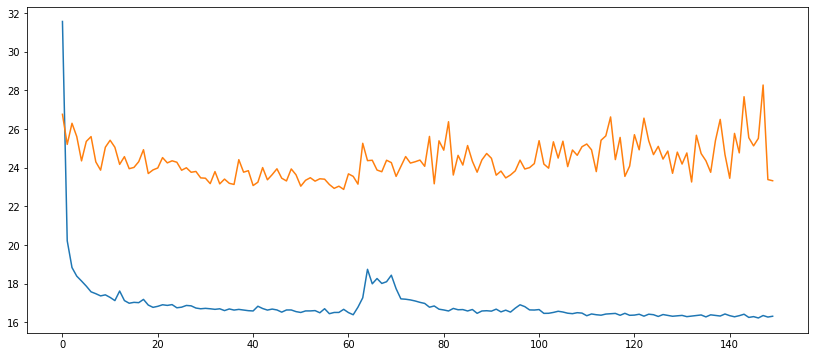

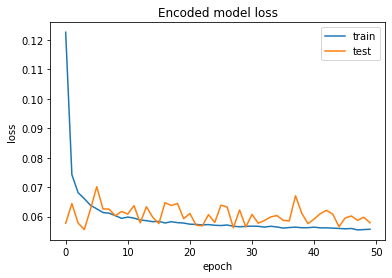

Overall accuracy of Convolutional Neural Network model: 0.9775983146067416


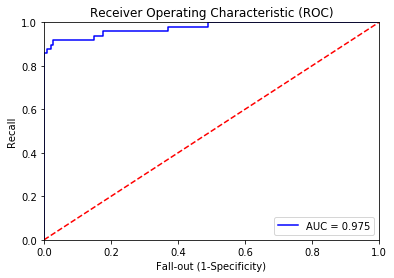

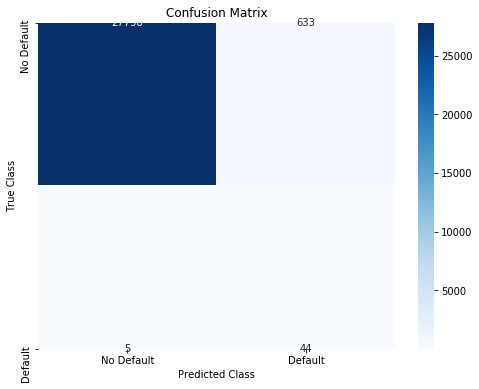

AUC(ROC): 0.9378473770008162
Precision: 0.06499261447562776
Recall: 0.8979591836734694
F1 score: 0.1212121212121212
False positives: 633
True positives: 44
False negatives: 5
True negatives: 27798
Fold #10
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511768, 30)
After OverSampling, the shape of train_y: (511768,) 

After OverSampling, counts of label '1': 255884
After OverSampling, counts of label '0': 255884
Model: "model_19"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_19 (InputLayer)           (None, 30)           0                                            
__________________________________________________________________________________________________
dense_82 (Dense)                (None, 27)           837         input_19[0][0]                   
__________________________________________________________________________________________________
batch_normalization_100 (BatchN (None, 27)           108         dense_82[0][0]                   
____________________________________________________________________________________

511768/511768 [==============================] - 28s 56us/step - loss: 11.2994 - rec_loss: 17.5462 - kl_loss: 4.1288 - val_loss: 13.2314 - val_rec_loss: 23.0955 - val_kl_loss: 2.9958
Epoch 17/150
511768/511768 [==============================] - 28s 56us/step - loss: 11.3068 - rec_loss: 17.5606 - kl_loss: 4.1366 - val_loss: 13.0735 - val_rec_loss: 22.8813 - val_kl_loss: 2.9142
Epoch 18/150
511768/511768 [==============================] - 29s 57us/step - loss: 11.2851 - rec_loss: 17.5034 - kl_loss: 4.1484 - val_loss: 13.3431 - val_rec_loss: 23.1258 - val_kl_loss: 3.1901
Epoch 19/150
511768/511768 [==============================] - 29s 56us/step - loss: 11.2391 - rec_loss: 17.4221 - kl_loss: 4.1493 - val_loss: 13.0504 - val_rec_loss: 22.7697 - val_kl_loss: 2.9589
Epoch 20/150
511768/511768 [==============================] - 29s 56us/step - loss: 11.2205 - rec_loss: 17.3718 - kl_loss: 4.1632 - val_loss: 13.7026 - val_rec_loss: 23.9991 - val_kl_loss: 3.0289
Epoch 21/150
511768/511768 [=====

Epoch 58/150
511768/511768 [==============================] - 28s 55us/step - loss: 10.8272 - rec_loss: 16.6704 - kl_loss: 4.2110 - val_loss: 12.9114 - val_rec_loss: 22.5541 - val_kl_loss: 2.9630
Epoch 59/150
511768/511768 [==============================] - 28s 55us/step - loss: 10.8264 - rec_loss: 16.6574 - kl_loss: 4.2264 - val_loss: 12.7783 - val_rec_loss: 22.3263 - val_kl_loss: 2.9038
Epoch 60/150
511768/511768 [==============================] - 28s 56us/step - loss: 10.8194 - rec_loss: 16.6602 - kl_loss: 4.2109 - val_loss: 12.7967 - val_rec_loss: 22.1965 - val_kl_loss: 3.0818
Epoch 61/150
511768/511768 [==============================] - 29s 56us/step - loss: 10.7828 - rec_loss: 16.5936 - kl_loss: 4.2135 - val_loss: 12.8823 - val_rec_loss: 22.4580 - val_kl_loss: 2.9959
Epoch 62/150
511768/511768 [==============================] - 29s 56us/step - loss: 10.7871 - rec_loss: 16.6231 - kl_loss: 4.2096 - val_loss: 13.0218 - val_rec_loss: 22.6020 - val_kl_loss: 3.1353
Epoch 63/150
511768/

Epoch 104/150
511768/511768 [==============================] - 28s 55us/step - loss: 10.7443 - rec_loss: 16.5976 - kl_loss: 4.2021 - val_loss: 13.3934 - val_rec_loss: 23.5630 - val_kl_loss: 2.8860
Epoch 105/150
511768/511768 [==============================] - 28s 55us/step - loss: 10.7048 - rec_loss: 16.5240 - kl_loss: 4.1970 - val_loss: 12.7314 - val_rec_loss: 22.1264 - val_kl_loss: 3.0181
Epoch 106/150
511768/511768 [==============================] - 28s 55us/step - loss: 10.7555 - rec_loss: 16.6090 - kl_loss: 4.2107 - val_loss: 13.2369 - val_rec_loss: 23.1352 - val_kl_loss: 3.0262
Epoch 107/150
511768/511768 [==============================] - 28s 56us/step - loss: 10.7914 - rec_loss: 16.6911 - kl_loss: 4.2072 - val_loss: 12.9777 - val_rec_loss: 22.5045 - val_kl_loss: 3.1193
Epoch 108/150
511768/511768 [==============================] - 28s 55us/step - loss: 10.7431 - rec_loss: 16.6071 - kl_loss: 4.1997 - val_loss: 13.2378 - val_rec_loss: 23.2238 - val_kl_loss: 2.9317
Epoch 109/150
5

511768/511768 [==============================] - 29s 56us/step - loss: 10.7457 - rec_loss: 16.6230 - kl_loss: 4.2151 - val_loss: 13.2056 - val_rec_loss: 23.2031 - val_kl_loss: 2.8974
Epoch 150/150
511768/511768 [==============================] - 28s 56us/step - loss: 10.7678 - rec_loss: 16.6455 - kl_loss: 4.2339 - val_loss: 13.0491 - val_rec_loss: 22.6902 - val_kl_loss: 3.0923
Train on 511768 samples, validate on 28480 samples
Epoch 1/50
511768/511768 [==============================] - 109s 213us/step - loss: 0.0964 - accuracy: 0.9655 - val_loss: 0.0690 - val_accuracy: 0.9777
Epoch 2/50
511768/511768 [==============================] - 108s 210us/step - loss: 0.0551 - accuracy: 0.9831 - val_loss: 0.0596 - val_accuracy: 0.9800
Epoch 3/50
511768/511768 [==============================] - 108s 210us/step - loss: 0.0492 - accuracy: 0.9852 - val_loss: 0.0517 - val_accuracy: 0.9838
Epoch 4/50
511768/511768 [==============================] - 108s 212us/step - loss: 0.0472 - accuracy: 0.9862 - v

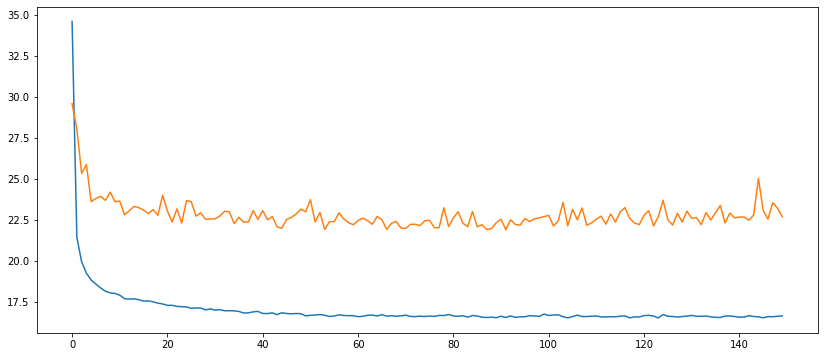

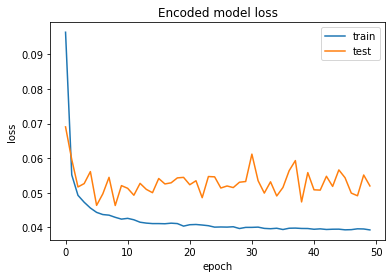

Overall accuracy of Convolutional Neural Network model: 0.9823384831460674


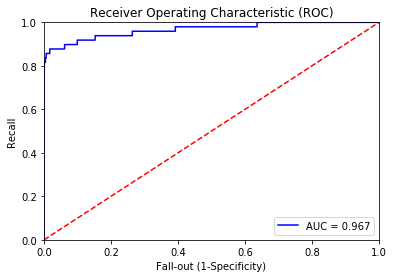

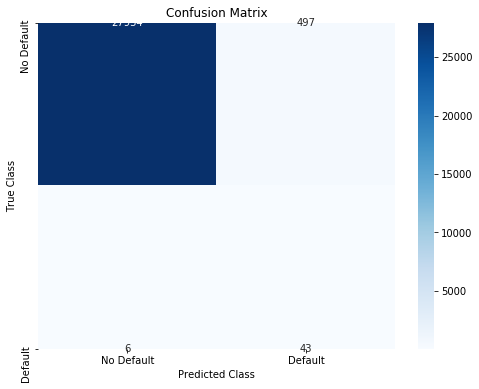

AUC(ROC): 0.9300350508463383
Precision: 0.07962962962962963
Recall: 0.8775510204081632
F1 score: 0.1460101867572156
False positives: 497
True positives: 43
False negatives: 6
True negatives: 27934


In [6]:
encoding_dim_1 = 27
encoding_dim_2 = 24
encoding_dim_3 = 21
#encoding_dim_4 = 20
#encoding_dim_5 = 18
hidden_dim = 15 #size of the hidden layer in encoder and decoder
latent_dim = 2 #number of latent variables to learn
learning_rate = 1e-3

#Cross_Validate

kf = StratifiedKFold(10, shuffle = True, random_state=42) # Use for Kfold Validation

tn_summary=[]
fp_summary=[]
fn_summary=[]
tp_summary=[]

def Average(lst): 
    return sum(lst) / len(lst)
    

fold = 0

for train, test in kf.split(X,y):
    fold +=1
    print(f"Fold #{fold}")
    
    
    
    x_train = X[train]
    y_train = y[train]
    x_test = X[test]
    y_test = y[test]

    
    scaler = preprocessing.StandardScaler()

    x_train, x_test = scaler.fit_transform(x_train), scaler.fit_transform(x_test) 
    
    
    print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
    print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

    sm = BorderlineSMOTE(random_state=2)
    X_res_train, y_train_res = sm.fit_sample(x_train, y_train.ravel())

    print('After OverSampling, the shape of train_X: {}'.format(X_res_train.shape))
    print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

    print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
    print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
    
    

    input_dim = X_res_train.shape[1]
    x = input_dim

    input_layer = Input(shape=(input_dim,))

    encoder = Dense(encoding_dim_1, activation='tanh',activity_regularizer=regularizers.l1(learning_rate))(input_layer)
    encoder = BatchNormalization()(encoder)

    encoder = Dense(encoding_dim_2, activation='tanh')(encoder)
    encoder = BatchNormalization()(encoder)

    encoder = Dense(encoding_dim_3, activation='tanh')(encoder)
    encoder = BatchNormalization()(encoder)

    #encoder = Dense (encoding_dim_4, activation = 'tanh')(encoder)
    #encoder = BatchNormalization()(encoder)

    #encoder = Dense (encoding_dim_5, activation = 'tanh')(encoder)
    #encoder = BatchNormalization()(encoder)

    encoder = Dense(hidden_dim, activation='tanh' , name='encoder_hidden')(encoder)
    encoder = BatchNormalization()(encoder)

    z_mean = Dense(latent_dim, name='z_mean')(encoder)
    z_log_var = Dense(latent_dim, name='z_log_var')(encoder)
    
    def sampling(args):
        z_mean, z_log_var = args
        epsilon = K.random_normal(shape=K.shape(z_mean), mean=0., stddev=1.)
        return z_mean + K.exp(z_log_var / 2) * epsilon

    z = Lambda(sampling, name='z_sampled')([z_mean, z_log_var])
    t = BatchNormalization()(z)

    decoder1 = Dense(hidden_dim, activation='tanh')(t)
    decoder1 = BatchNormalization()(decoder1) 

    #decoder = Dense(encoding_dim_5, activation = 'tanh')(decoder)
    #decoder = BatchNormalization()(decoder)

    #decoder = Dense(encoding_dim_4, activation = 'tanh')(decoder)
    #decoder = BatchNormalization()(decoder)

    decoder = Dense(encoding_dim_3, activation='tanh')(decoder1)
    decoder = BatchNormalization()(decoder)

    decoder = Dense(encoding_dim_2, activation='tanh')(decoder)
    decoder = BatchNormalization()(decoder)

    decoder = Dense(encoding_dim_1, activation='tanh')(decoder)
    decoder = BatchNormalization()(decoder)


    decoded_mean = Dense(input_dim, activation=None, name='decoded_mean')(decoder)


    vae = Model(inputs=input_layer, outputs=decoded_mean)
    
    def rec_loss(y_true, y_pred):
        return K.sum(K.square(y_true - y_pred), axis=-1)

    def kl_loss(y_true, y_pred):
        return - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)

    def vae_loss(x, decoded_mean):
        rec_loss = K.sum(K.square(x - decoded_mean), axis=-1)
        kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
        return K.mean((rec_loss + kl_loss) / 2)

    vae.compile(optimizer=RMSprop(lr=learning_rate), loss=vae_loss, metrics=[rec_loss, kl_loss])
    vae.summary()
    
    n_epochs = 150
    batch_size = 128

#early_stopping = EarlyStopping(monitor='loss', patience=10, min_delta=1e-5) #stop training if loss does not decrease with at least 0.00001
#reduce_lr = ReduceLROnPlateau(monitor='loss', patience=5, min_delta=1e-5, factor=0.2) #reduce learning rate (divide it by 5 = multiply it by 0.2) if loss does not decrease with at least 0.00001

#callbacks = [reduce_lr]

#collect training data in history object
    history = vae.fit(X_res_train, X_res_train, 
                  validation_data=(x_test, x_test),
                  batch_size=batch_size,
                  shuffle = True,
                  epochs=n_epochs,
                  )
    
    
    fig = plt.figure(figsize=(14, 6))
    ax = fig.gca()
    ax.plot(history.history['rec_loss']);
    ax.plot(history.history['val_rec_loss']);
    
    
    
    # Create a separate model (encoder) in order to make encodings (first part of the autoencoder model)
    encoder_model = Model(input_layer, decoder1)
    # Create a placeholder for an encoded input
    encoded_input = Input(shape=(hidden_dim,))
    
    
    #Encode data set from above using the encoder
    encoded_train_x = encoder_model.predict(X_res_train)
    encoded_test_x = encoder_model.predict(x_test)
    #Reshape data for the CNN model
    encoded_train_x = encoded_train_x.reshape(encoded_train_x.shape[0],encoded_train_x.shape[1], 1)
    encoded_test_x = encoded_test_x.reshape(encoded_test_x.shape[0], encoded_test_x.shape[1], 1)
    encoded_train_x.shape
    
    #--------------------------------Build new model using encoded data--------------------------

    model = Sequential()
    model.add(Conv1D(32, 2, activation='relu', input_shape = encoded_train_x[1].shape))
    model.add(BatchNormalization())
    model.add(MaxPool1D(2))
    model.add(Dropout(0.2))

    model.add(Conv1D(64, 2, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool1D(2))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy',metrics=['accuracy'])
    history = model.fit(encoded_train_x, y_train_res, epochs=50,validation_data=(encoded_test_x, y_test), verbose=1)

    # Summarize history for loss
    plt.figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Encoded model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()
    
    

        #---------------------------------Predictions and visuallizations-----------------------#Predict on test set
    predictions_CNN_prob = model.predict(encoded_test_x)
    predictions_CNN_prob = predictions_CNN_prob[:,0]
    predictions_CNN_01 = np.where(predictions_CNN_prob > 0.5, 1, 0) #Turn probability to 0-1 binary output
    #Print accuracy
    acc_CNN = accuracy_score(y_test, predictions_CNN_01)
    print('Overall accuracy of Convolutional Neural Network model:', acc_CNN)
    #Print Area Under Curve
    false_positive_rate, recall, thresholds = roc_curve(y_test,predictions_CNN_prob)
    roc_auc = auc(false_positive_rate, recall)
    plt.figure()
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1], [0,1], 'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.ylabel('Recall')
    plt.xlabel('Fall-out (1-Specificity)')
    plt.show()
    #Print Confusion Matrix
    cm = confusion_matrix(y_test, predictions_CNN_01)
    labels = ['No Default', 'Default']
    plt.figure(figsize=(8,6))
    sns.heatmap(cm,xticklabels=labels, yticklabels=labels, annot=True, fmt='d',cmap="Blues", vmin = 0.2);
    plt.title('Confusion Matrix')
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    plt.show()


    print("AUC(ROC): " + str(metrics.roc_auc_score(y_test, predictions_CNN_01)))
    print("Precision: " + str(metrics.precision_score(y_test, predictions_CNN_01)))
    print("Recall: " + str(metrics.recall_score(y_test, predictions_CNN_01)))
    print("F1 score: " + str(metrics.f1_score(y_test, predictions_CNN_01)))

    tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions_CNN_01).ravel()

    print("False positives: " + str(fp))
    print("True positives: " + str(tp))
    print("False negatives: " + str(fn))
    print("True negatives: " + str(tn))
    

    tn_summary.append(tn)
    fp_summary.append(fp)
    fn_summary.append(fn)
    tp_summary.append(tp)
    

      

In [7]:

print("Average tn = " + str(Average(tn_summary)))
print("Average fp = " + str(Average(fp_summary)))
print("Average fn = "+ str(Average(fn_summary)))    
print("Average tp = "+ str(Average(tp_summary)))   


Average_precision = Average(tp_summary)/(Average(tp_summary)+Average(fp_summary))
Average_recall = Average(tp_summary)/(Average(tp_summary)+Average(fn_summary))
Average_f1_score = 2*Average_precision*Average_recall/(Average_precision + Average_recall)

print("Average Precision = {:0.2f}%".format(Average_precision*100))

print("Average Recall = {:0.2f}%".format(Average_recall*100))

print("Average F1 score = {:0.2f}%".format(Average_f1_score*100))

Average tn = 27850.4
Average fp = 581.1
Average fn = 5.8
Average tp = 43.4
Average Precision = 6.95%
Average Recall = 88.21%
Average F1 score = 12.88%


In [8]:
total_tn=0
total_fp=0
total_fn=0
total_tp=0

for i in tn_summary:
    total_tn = total_tn + i

for j in fp_summary:
    total_fp = total_fp + j
    
for x in fn_summary:
    total_fn = total_fn + x
    
for y in tp_summary:
    total_tp = total_tp + y

print(" Total tn: " + str(total_tn))
print("Total fp: " + str(total_fp))
print(" Total fn:" + str(total_fn))
print(" Total tp:" + str(total_tp))


Total_Precision = total_tp/(total_tp + total_fp)
Total_Recall = total_tp/(total_tp+ total_fn)

Total_F1_score = 2*Total_Precision*Total_Recall/(Total_Precision + Total_Recall)

print("Total Precision = " + str(Total_Precision))
print("Total Recall = " + str(Total_Recall))
print("Total F1_score = " + str(Total_F1_score))
    


 Total tn: 278504
Total fp: 5811
 Total fn:58
 Total tp:434
Total Precision = 0.06949559647718175
Total Recall = 0.8821138211382114
Total F1_score = 0.1288407302953837
